done simulate data 330.53840231895447
done compute mu map and mu in length interval 0.04380202293395996
done null simulation 255.1225037574768
len fretimes 1663071
len mufreqs 1663071
18.45370864868164
BIC:  -5707.461444568075
all done
all done 0 1.673677921295166
done simulate data 249.77276706695557
done compute mu map and mu in length interval 0.042368412017822266
done null simulation 212.68726134300232
len fretimes 1661328
len mufreqs 1661328
17.988402605056763
BIC:  -5414.545854833847
all done
all done 1 1.683318853378296
done simulate data 253.72872686386108
done compute mu map and mu in length interval 0.04219961166381836
done null simulation 211.98080325126648
len fretimes 1660879
len mufreqs 1660879
18.161920309066772
BIC:  -4636.400175690656
all done
all done 2 1.5981969833374023
done simulate data 252.55257511138916
done compute mu map and mu in length interval 0.04212522506713867
done null simulation 214.98997378349304
len fretimes 1661071
len mufreqs 1661071
18.26178002357

/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_801/3758215253.py:631: RuntimeWarning: invalid 

(3000.0, 350000.0)

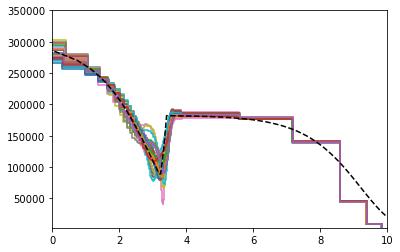

In [1]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])

seq_len = 50000000 
sam_size = 100000

pop_size_con = 50000
r_con = 10**(-8)

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########

epsilon=0.00001
# gene_conver =2*10**(-8)
# track_len=300


c_value = 0.65*10**(-1)
c1=0

totaliter=25

numtildet = 100


########################## Demographic model #########################################

pop_ini_size = 150000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.05])
demo_model.add_population_parameters_change(25,  initial_size=None, growth_rate=-0.15, population=None)
demo_model.add_population_parameters_change(30,  initial_size=None, growth_rate=1*10**(-4), population=None)


############################## r map ######################################

r_map = 10**(-8)

# r_map = msprime.RateMap(
#     position=(numpy.array([0, 10**6, 2*10**6, 3*10**6, 4*10**6, 5*10**6, 6*10**6, 7*10**6, 8*10**6, 9*10**6, 10*10**6])*5).tolist(),
#     rate=(5*numpy.array([0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8)\
#          , 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8)])).tolist() 
# )

############################ mu map         ###################################
################################################################################
mu_map = 1.3*10**(-8)

# mu_map = msprime.RateMap(
#     position=(5*numpy.array([0,  2*10**6,  4*10**6,  6*10**6, 8*10**6,  10*10**6])).tolist(),
#     rate=(5*numpy.array([0.7*10**(-8), 1*10**(-8), 1.3*10**(-8), 1.6*10**(-8), 1.9*10**(-8)])).tolist()
# )


################################################################################




lamd = []
Ntlist = []
investlist = []

sum_time = 0
for it in range(totaliter):

    s_time_sim_data = time.time()
    
####### observe #########
    ts1 = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_map, 
        sequence_length= seq_len,
#         population_size = pop_size,
#         gene_conversion_rate = gene_conver ,
#         gene_conversion_tract_length = track_len,
        #random_seed = seed,
#         discrete_genome=False,
        demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                discrete_genome=False,
                                #random_seed=seed
                               )

    #print(iter,"done generating")

    
    e_time_sim_data = time.time()
    print('done simulate data', e_time_sim_data-s_time_sim_data)
    
    s_time = time.time()
    
    if mu_map_unknown == 1:
        site_pos_sort = mts1.tables.sites.position
        aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
        mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())

    

    if isinstance(mu_map, float) ==1:
        seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
        seq_bp.append(seq_len)
        seq_bp=numpy.array(seq_bp)
    else:
        seq_bp = [0]
        current_seq_site = 0
        need_cum_rate = c_value
        for i in range(len(mu_map.right)):
            current_mu_change_point = mu_map.right[i]
            current_mu_map_rate = mu_map.rate[i]
            while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                current_seq_site = seq_bp[-1]
                need_cum_rate = c_value
            need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
            current_seq_site = current_mu_change_point
        if seq_bp[-1] != seq_len:
            seq_bp.append(seq_len)
        seq_bp = numpy.array(seq_bp)


                  ###### Compute the weighted average mu of each interval ###########
    mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )

    ################################################################################    
    
    e_time_mu = time.time()
    print("done compute mu map and mu in length interval", e_time_mu-s_time)

    ts = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_con, 
        sequence_length= seq_len,
        population_size = pop_size_con,
#         random_seed =simtree+1026,
#         discrete_genome=False,
        #demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts = msprime.sim_mutations(ts, rate = mu_map,
                                discrete_genome=False,
#                                 random_seed=simtree+1026
                               )

    #print(iter,"done generating")
    
    e_time_null_sim = time.time()
    print("done null simulation", e_time_null_sim-s_time)
    
    
    
    s_time_xmat_ymat = time.time()


    #### new improvement ######################################### 

    mu_time = mts.tables.mutations.time
#     mu_site_id = mts.tables.mutations.site
#     mu_site = mts.tables.sites.position[mu_site_id]
#     mu_node = mts.tables.mutations.node
    mufreq = numpy.zeros(len(mu_time))
#     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     current_seq_int = 0
#     current_site = seq_bp[0]
#     current_interval_r = seq_bp[1]
#     current_rate_nomu = numpy.zeros(2*sam_size-1)
    freqtime = mu_time


    #####################################################
    ######################################################
    ######################################################
    ######################################################
    #####################################################



#     tildetcheckm1 = []
#     for i in range(1,numtildet-1):
#         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
#     tildetcheck = tildetcheckm1 + [max(freqtime)]

# #   自己决定tildetcheck    
#     tildetcheck = numpy.linspace(0.2,4.8,24).tolist() + numpy.linspace(5,24,20).tolist()+ \
#             numpy.linspace(25,200,10).tolist()+ numpy.linspace(1200,30200,30).tolist()
#     if tildetcheck[-1] < max(freqtime):
#         tildetcheck = tildetcheck+[max(freqtime)]

#   自己决定tildetcheck    
    tildetcheck = numpy.linspace(0.5,25,50).tolist() + (30*numpy.exp(numpy.arange(0,20.1,4)*0.4)).tolist()
    if tildetcheck[-1] < max(freqtime):
        tildetcheck = tildetcheck+[max(freqtime)]




    time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

    mu_index = 0
    for tree in mts.trees():
        for each_mu in tree.mutations():
            mufreq[mu_index] = tree.num_samples(each_mu.node)
            mu_index = mu_index+1
        


#         ## pairs (i, i+1)
#         tree_high = numpy.zeros(2*sam_size-1)
#         for i in range(2*sam_size-1):
#             ## pairs (i, i+1)
#             tree_high[i] = 2*tree.tmrca(i,i+1)     
#         tree_lp = tree.interval[0]
#         tree_rp = tree.interval[1]


#         while tree_rp >= current_interval_r:
#             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
#                                                                     tree_high*(current_interval_r - current_site)
#             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
#                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
#             if isinstance(mu_map, float) ==1 :
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
#             else:
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
#             current_site = current_interval_r
#             current_rate_nomu = numpy.zeros(2*sam_size-1)
#             if current_site != seq_bp[-1]:
#                 current_seq_int = current_seq_int+1
#                 current_interval_r = seq_bp[current_seq_int+1]
#             else:
#                 break


#         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
#         current_site = tree_rp

#     ############################################################################ 

#     if len(mufreq) != len(freqtime):
#         print("something is wrong")
#     print("done2") 

    ############################################################################ 


    nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]
    
    

    #########################################################################################

    nummuwithin_obs= numpy.array(nummuwithin_obs) + numpy.array( numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) \
                    -  numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) ) 
    nummuwithin_obs = nummuwithin_obs*(nummuwithin_obs>0)

    ##############################################################################################




    freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
    freqtimes = freqtsortbytime[0]
    mufreqs = freqtsortbytime[1]

    tinterval = numpy.zeros(len(freqtimes))
    curint = 0
    tiltind = 0
    curtimett = tildetcheck[tiltind]
    print("len fretimes", len(freqtimes))
    for i in range(len(freqtimes)):
        if freqtimes[i] <= curtimett:
            tinterval[i] = curint
        else:
            tiltind = tiltind + 1
            curtimett = tildetcheck[tiltind]
            while curtimett<freqtimes[i]:
                curint = curint + 1
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]

            curint = curint + 1
            tinterval[i] = curint

    tinterval = tinterval.astype(int)
    ##############################################################

#     ####### new improvement ############

#     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
#     for i in range(2*sam_size-1):
#         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
#                                                     windows = seq_bp, span_normalise=False)
#         current_afs = current_afs_all[:,1]
#         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
#         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

#     print("done2")     


#     afs_sort = numpy.sort(afs)
#     sortindex = numpy.argsort(rate_mu)
#     rate_mu_sort = rate_mu[sortindex]
#     timevec_all_sort = timevec_all[sortindex]

    #############################################################################################
    ##############################################################################################


    Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
    Xmat = Xmat.astype("float64")

    infreqint = numpy.zeros(len(mufreqs))
    for i in range(len(mufreqs)):
        infreqint[i] =  mufreqs[i]-1 
    infreqint = infreqint.astype(int)

    lenf = len(nummuwithin_obs)
    print("len mufreqs", len(mufreqs))
    for i in range(len(mufreqs)):
        a1 = infreqint[i] 
        a2 = tinterval[i]
        if a1 < lenf:
            Xmat[a1][a2] = Xmat[a1][a2] + 1


    Ymat = numpy.array(nummuwithin_obs)
    Ymat = Ymat.astype("float64")


    ####### new improvement ############

#     ####### new improvement ############


#     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
#     for i in range(len(timevec_all_sort)):
#         current_time = timevec_all_sort[i]
#         current_rate = rate_mu_sort[i]
#         index = find_s_s(current_time,time_bp)
#         if index==0:
#             Xmat_new[i,index] = current_rate
#         else:
#             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
#             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
#             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

#     #### density deconvolution
#     Ymat_obs = afs_sort        
#     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
#     den_mean = numpy.zeros(len(yvec))
#     den_obs = numpy.zeros(len(yvec))
#     for i in range(len(yvec)):
#         val = yvec[i]
#         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
#     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
#     for i in range(len(find_den_x_mat)):
#         val = yvec[i]
#         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
#     find_den_y_mat = den_obs
#     lm = LinearRegression(fit_intercept=False,positive = True)
#     lm.fit(find_den_x_mat,find_den_y_mat)    
#     den_mean = lm.coef_
#     cdf_mean = numpy.cumsum(den_mean)
#     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
#     Ymat_new = numpy.zeros(len(Xmat_new))
#     for i in range(len(quan_vec)):
#         yloc = find_s_s(quan_vec[i],cdf_mean)
#         if yloc==0:
#             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
#         elif yloc == len(cdf_mean):
#             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
#         else:
#             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



#     #     Xmat_new = Xmat_new[0:3000]
#     #     Ymat_new = Ymat_new[0:3000]

#     ##############################################################################################





    ####### combine #############################################################

#     ####### weight Xmat_new so that it has equal importance to Xmat

#     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
#     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )

    
    Xmat = Xmat[1:]
    Ymat = Ymat[1:]

#     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
#     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
    Xmat_combine = Xmat
    Ymat_combine = Ymat

    e_time_xmat_ymat = time.time()

    print(    e_time_xmat_ymat -     s_time_xmat_ymat )

    
    
    


    s_time_reg = time.time()
    
    ## weighted least square
    Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
    Yfit = numpy.zeros(len(Ymat_combine))
    for i in range(len(Ymat_combine)):
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
        Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




    ########################### penalyse difference of slopes ######

    current_lambda = 1*10**3.5

    PXmat = numpy.zeros((len(Xfit[0])-2, len(Xfit[0]) ))

    It_list = numpy.array(tildetcheck)
    It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

    ### weighting beta by time gap ########################
    for i in range(len(PXmat)):
        PXmat[i,i] =  numpy.sqrt(current_lambda)*(1)
        PXmat[i,i+1] = numpy.sqrt(current_lambda)*( -2 ) 
        PXmat[i,i+2] = numpy.sqrt(current_lambda)*(1)

    PYmat = numpy.zeros(len(Xfit[0])-2)

    Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
    Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

    fitmodel = LinearRegression(fit_intercept=False,positive = True)

    fitmodel.fit(Xfit1,Yfit1)    
    sol = fitmodel.coef_

    # correct the last term:
    sol[-1]= 2*sol[-2] - sol[-3]  


    #############################

    rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
    aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
    bb= numpy.linalg.inv(aa)
    cc = numpy.matmul(Xfit,bb)
    df = sum(sum(cc*Xfit))
    bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
    print("BIC: ",bic)

    #############################



    tcheck = [sol[0]*tildetcheck[0] ]
    for i in range(1,len(tildetcheck)):
        tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

    #############################################################################

    invest = []
    invest.append(0)
    Nt = []
    for i in range(len(tcheck)-1):
        Nt.append(sol[i]*pop_size_con*2)
        Nt.append(sol[i]*pop_size_con*2)
        invest.append(tcheck[i])
        invest.append(tcheck[i])
    Nt.append(sol[-1]*pop_size_con*2)
    Nt.append(sol[-1]*pop_size_con*2)
    invest.append(tcheck[-1])


    Ntlist.append(Nt)  
    investlist.append(invest)
    print("all done")

    e_time = time.time()

    sum_time = sum_time + e_time-s_time    
    
    e_time_reg = time.time()
    
    print("all done",it, e_time_reg-s_time_reg)
    
    name = str(it)+"Model7_Ntlist_approach12.dat"
    file = open(name,"wb") 
    pickle.dump(Nt,file)
    file.close()

    name = str(it)+"Model7_investlist_approach12.dat"
    file = open(name,"wb") 
    pickle.dump(invest,file)
    file.close()

ave_time = sum_time/totaliter
print("average time", ave_time)

name = "Model7_ave_time_approach12.dat"
file = open(name,"wb") 
pickle.dump(ave_time,file)
file.close()   

name = "Model7_Ntlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(Ntlist,file)
file.close()

name = "Model7_investlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(investlist,file)
file.close()

name = "Model7_lambda_approach12.dat"
file = open(name,"wb") 
pickle.dump(lamd,file)
file.close()



    



for i in range(len(Ntlist)):
    investlist[i][0]=0.001
    plt.plot(numpy.log(investlist[i]),Ntlist[i])

x1 = numpy.linspace(0.1,200,200)
x2 = numpy.linspace(205,50000,500)
x = numpy.array(x1.tolist()+x2.tolist())

y = numpy.zeros(len(x))

for i in range(len(x)):
    if x[i] <= 25:
        y[i] = 300000*numpy.exp(-0.05*x[i])
    elif x[i] <=30:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( x[i]-25)*0.15)
    else:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( x[i]-30)*(-0.0001) )

        
plt.plot(numpy.log(x),y,'k--')



plt.xlim(0,10)
plt.ylim(3000,350000)




In [1]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])

seq_len = 50000000 
sam_size = 100000

pop_size_con = 50000
r_con = 10**(-8)

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########

epsilon=0.00001
# gene_conver =2*10**(-8)
# track_len=300


c_value = 0.65*10**(-1)
c1=0

totaliter=1

numtildet = 100


########################## Demographic model #########################################

pop_ini_size = 150000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.05])
demo_model.add_population_parameters_change(25,  initial_size=None, growth_rate=-0.15, population=None)
demo_model.add_population_parameters_change(30,  initial_size=None, growth_rate=1*10**(-4), population=None)


############################## r map ######################################

r_map = 10**(-8)

# r_map = msprime.RateMap(
#     position=(numpy.array([0, 10**6, 2*10**6, 3*10**6, 4*10**6, 5*10**6, 6*10**6, 7*10**6, 8*10**6, 9*10**6, 10*10**6])*5).tolist(),
#     rate=(5*numpy.array([0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8)\
#          , 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8)])).tolist() 
# )

############################ mu map         ###################################
################################################################################
mu_map = 1.3*10**(-8)

# mu_map = msprime.RateMap(
#     position=(5*numpy.array([0,  2*10**6,  4*10**6,  6*10**6, 8*10**6,  10*10**6])).tolist(),
#     rate=(5*numpy.array([0.7*10**(-8), 1*10**(-8), 1.3*10**(-8), 1.6*10**(-8), 1.9*10**(-8)])).tolist()
# )


################################################################################




lamd = []
Ntlist = []
investlist = []

sum_time = 0

lam_list = [10**1.5,10**2.5,10**3.5,10**4.5,10**5.5]

seed=7
while seed<100:
    seed = seed+1
    bic_list = numpy.zeros(5)
    for lll in range(len(lam_list)):
        numpy.random.seed(seed+int(lam_list[lll]))
        for it in range(totaliter):

            s_time_sim_data = time.time()

        ####### observe #########
            ts1 = msprime.sim_ancestry(
                samples=sam_size,
                recombination_rate= r_map, 
                sequence_length= seq_len,
        #         population_size = pop_size,
        #         gene_conversion_rate = gene_conver ,
        #         gene_conversion_tract_length = track_len,
                random_seed = seed+int(lam_list[lll]),
        #         discrete_genome=False,
                demography = demo_model
                )
            # Visualise the simulated ancestral history.
            #SVG(ts.draw_svg())

            #ts.num_trees


            mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                        discrete_genome=False,
                                        random_seed=seed+int(lam_list[lll])
                                       )

            #print(iter,"done generating")


            e_time_sim_data = time.time()
            print('done simulate data', e_time_sim_data-s_time_sim_data)

            s_time = time.time()

            if mu_map_unknown == 1:
                site_pos_sort = mts1.tables.sites.position
                aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
                mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())



            if isinstance(mu_map, float) ==1:
                seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
                seq_bp.append(seq_len)
                seq_bp=numpy.array(seq_bp)
            else:
                seq_bp = [0]
                current_seq_site = 0
                need_cum_rate = c_value
                for i in range(len(mu_map.right)):
                    current_mu_change_point = mu_map.right[i]
                    current_mu_map_rate = mu_map.rate[i]
                    while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                        seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                        current_seq_site = seq_bp[-1]
                        need_cum_rate = c_value
                    need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
                    current_seq_site = current_mu_change_point
                if seq_bp[-1] != seq_len:
                    seq_bp.append(seq_len)
                seq_bp = numpy.array(seq_bp)


                          ###### Compute the weighted average mu of each interval ###########
            mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )

            ################################################################################    

            e_time_mu = time.time()
            print("done compute mu map and mu in length interval", e_time_mu-s_time)

            ts = msprime.sim_ancestry(
                samples=sam_size,
                recombination_rate= r_con, 
                sequence_length= seq_len,
                population_size = pop_size_con,
                random_seed =seed+int(lam_list[lll])+1026,
        #         discrete_genome=False,
                #demography = demo_model
                )
            # Visualise the simulated ancestral history.
            #SVG(ts.draw_svg())

            #ts.num_trees


            mts = msprime.sim_mutations(ts, rate = mu_map,
                                        discrete_genome=False,
                                        random_seed=seed+int(lam_list[lll])+1026
                                       )

            #print(iter,"done generating")

            e_time_null_sim = time.time()
            print("done null simulation", e_time_null_sim-s_time)



            s_time_xmat_ymat = time.time()


            #### new improvement ######################################### 

            mu_time = mts.tables.mutations.time
        #     mu_site_id = mts.tables.mutations.site
        #     mu_site = mts.tables.sites.position[mu_site_id]
        #     mu_node = mts.tables.mutations.node
            mufreq = numpy.zeros(len(mu_time))
        #     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
        #     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
        #     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
        #     current_seq_int = 0
        #     current_site = seq_bp[0]
        #     current_interval_r = seq_bp[1]
        #     current_rate_nomu = numpy.zeros(2*sam_size-1)
            freqtime = mu_time


            #####################################################
            ######################################################
            ######################################################
            ######################################################
            #####################################################



        #     tildetcheckm1 = []
        #     for i in range(1,numtildet-1):
        #         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
        #     tildetcheck = tildetcheckm1 + [max(freqtime)]

        # #   自己决定tildetcheck    
        #     tildetcheck = numpy.linspace(0.2,4.8,24).tolist() + numpy.linspace(5,24,20).tolist()+ \
        #             numpy.linspace(25,200,10).tolist()+ numpy.linspace(1200,30200,30).tolist()
        #     if tildetcheck[-1] < max(freqtime):
        #         tildetcheck = tildetcheck+[max(freqtime)]

        #   自己决定tildetcheck    
            tildetcheck = numpy.linspace(0.5,25,50).tolist() + (30*numpy.exp(numpy.arange(0,20.1,4)*0.4)).tolist()
            if tildetcheck[-1] < max(freqtime):
                tildetcheck = tildetcheck+[max(freqtime)]




            time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

            mu_index = 0
            for tree in mts.trees():
                for each_mu in tree.mutations():
                    mufreq[mu_index] = tree.num_samples(each_mu.node)
                    mu_index = mu_index+1



        #         ## pairs (i, i+1)
        #         tree_high = numpy.zeros(2*sam_size-1)
        #         for i in range(2*sam_size-1):
        #             ## pairs (i, i+1)
        #             tree_high[i] = 2*tree.tmrca(i,i+1)     
        #         tree_lp = tree.interval[0]
        #         tree_rp = tree.interval[1]


        #         while tree_rp >= current_interval_r:
        #             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
        #                                                                     tree_high*(current_interval_r - current_site)
        #             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
        #                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
        #                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
        #             if isinstance(mu_map, float) ==1 :
        #                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
        #                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
        #             else:
        #                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
        #                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
        #             current_site = current_interval_r
        #             current_rate_nomu = numpy.zeros(2*sam_size-1)
        #             if current_site != seq_bp[-1]:
        #                 current_seq_int = current_seq_int+1
        #                 current_interval_r = seq_bp[current_seq_int+1]
        #             else:
        #                 break


        #         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
        #         current_site = tree_rp

        #     ############################################################################ 

        #     if len(mufreq) != len(freqtime):
        #         print("something is wrong")
        #     print("done2") 

            ############################################################################ 


            nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]



            #########################################################################################

            nummuwithin_obs= numpy.array(nummuwithin_obs) + numpy.array( numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) \
                            -  numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) ) 
            nummuwithin_obs = nummuwithin_obs*(nummuwithin_obs>0)

            ##############################################################################################




            freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
            freqtimes = freqtsortbytime[0]
            mufreqs = freqtsortbytime[1]

            tinterval = numpy.zeros(len(freqtimes))
            curint = 0
            tiltind = 0
            curtimett = tildetcheck[tiltind]
            print("len fretimes", len(freqtimes))
            for i in range(len(freqtimes)):
                if freqtimes[i] <= curtimett:
                    tinterval[i] = curint
                else:
                    tiltind = tiltind + 1
                    curtimett = tildetcheck[tiltind]
                    while curtimett<freqtimes[i]:
                        curint = curint + 1
                        tiltind = tiltind + 1
                        curtimett = tildetcheck[tiltind]

                    curint = curint + 1
                    tinterval[i] = curint

            tinterval = tinterval.astype(int)
            ##############################################################

        #     ####### new improvement ############

        #     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
        #     for i in range(2*sam_size-1):
        #         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
        #                                                     windows = seq_bp, span_normalise=False)
        #         current_afs = current_afs_all[:,1]
        #         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
        #         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

        #     print("done2")     


        #     afs_sort = numpy.sort(afs)
        #     sortindex = numpy.argsort(rate_mu)
        #     rate_mu_sort = rate_mu[sortindex]
        #     timevec_all_sort = timevec_all[sortindex]

            #############################################################################################
            ##############################################################################################


            Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
            Xmat = Xmat.astype("float64")

            infreqint = numpy.zeros(len(mufreqs))
            for i in range(len(mufreqs)):
                infreqint[i] =  mufreqs[i]-1 
            infreqint = infreqint.astype(int)

            lenf = len(nummuwithin_obs)
            print("len mufreqs", len(mufreqs))
            for i in range(len(mufreqs)):
                a1 = infreqint[i] 
                a2 = tinterval[i]
                if a1 < lenf:
                    Xmat[a1][a2] = Xmat[a1][a2] + 1


            Ymat = numpy.array(nummuwithin_obs)
            Ymat = Ymat.astype("float64")


            ####### new improvement ############

        #     ####### new improvement ############


        #     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
        #     for i in range(len(timevec_all_sort)):
        #         current_time = timevec_all_sort[i]
        #         current_rate = rate_mu_sort[i]
        #         index = find_s_s(current_time,time_bp)
        #         if index==0:
        #             Xmat_new[i,index] = current_rate
        #         else:
        #             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
        #             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
        #             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

        #     #### density deconvolution
        #     Ymat_obs = afs_sort        
        #     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
        #     den_mean = numpy.zeros(len(yvec))
        #     den_obs = numpy.zeros(len(yvec))
        #     for i in range(len(yvec)):
        #         val = yvec[i]
        #         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
        #     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
        #     for i in range(len(find_den_x_mat)):
        #         val = yvec[i]
        #         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
        #     find_den_y_mat = den_obs
        #     lm = LinearRegression(fit_intercept=False,positive = True)
        #     lm.fit(find_den_x_mat,find_den_y_mat)    
        #     den_mean = lm.coef_
        #     cdf_mean = numpy.cumsum(den_mean)
        #     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
        #     Ymat_new = numpy.zeros(len(Xmat_new))
        #     for i in range(len(quan_vec)):
        #         yloc = find_s_s(quan_vec[i],cdf_mean)
        #         if yloc==0:
        #             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
        #         elif yloc == len(cdf_mean):
        #             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
        #         else:
        #             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



        #     #     Xmat_new = Xmat_new[0:3000]
        #     #     Ymat_new = Ymat_new[0:3000]

        #     ##############################################################################################





            ####### combine #############################################################

        #     ####### weight Xmat_new so that it has equal importance to Xmat

        #     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
        #     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )


            Xmat = Xmat[1:]
            Ymat = Ymat[1:]

        #     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
        #     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
            Xmat_combine = Xmat
            Ymat_combine = Ymat

            e_time_xmat_ymat = time.time()

            print(    e_time_xmat_ymat -     s_time_xmat_ymat )






            s_time_reg = time.time()

            ## weighted least square
            Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
            Yfit = numpy.zeros(len(Ymat_combine))
            for i in range(len(Ymat_combine)):
            #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
            #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
            #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
            #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
                Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
                Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




            ########################### penalyse difference of slopes ######

            current_lambda = lam_list[lll]

            PXmat = numpy.zeros((len(Xmat_combine[0])-2, len(Xmat_combine[0]) ))


            It_list = numpy.array(tildetcheck)
            It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

            ### weighting beta by time gap ########################
            for i in range(len(PXmat)):
                PXmat[i,i] =  numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i] + It_list[i+1]) )
                PXmat[i,i+1] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*(-1/(0.5*(It_list[i] + It_list[i+1]) ) - 1/(0.5*(It_list[i+1] + It_list[i+2]) ) ) 
                PXmat[i,i+2] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i+1] + It_list[i+2]) )

            PYmat = numpy.zeros(len(Xmat_combine[0])-2)

            Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
            Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

            fitmodel = LinearRegression(fit_intercept=False,positive = True)

            fitmodel.fit(Xfit1,Yfit1)    
            sol = fitmodel.coef_

            # correct the last term:
            sol[-1]= 0.5*(It_list[i+1] + It_list[i+1])*(1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-2] \
                                                        + 1/(0.5*(It_list[i+1] + It_list[i+1]) )*sol[-2]\
                                                        - 1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-3]  )

            #############################

            rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
            aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
            bb= numpy.linalg.inv(aa)
            cc = numpy.matmul(Xfit,bb)
            df = sum(sum(cc*Xfit))
            bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
            print("BIC: ",bic)
            bic_list[lll] = bic

            #############################



            tcheck = [sol[0]*tildetcheck[0] ]
            for i in range(1,len(tildetcheck)):
                tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

            #############################################################################

            invest = []
            invest.append(0)
            Nt = []
            for i in range(len(tcheck)-1):
                Nt.append(sol[i]*pop_size_con*2)
                Nt.append(sol[i]*pop_size_con*2)
                invest.append(tcheck[i])
                invest.append(tcheck[i])
            Nt.append(sol[-1]*pop_size_con*2)
            Nt.append(sol[-1]*pop_size_con*2)
            invest.append(tcheck[-1])


            Ntlist.append(Nt)  
            investlist.append(invest)
            print("all done")

            e_time = time.time()

            sum_time = sum_time + e_time-s_time    

            e_time_reg = time.time()

            print("all done",it, e_time_reg-s_time_reg)

#             name = str(it)+"Model7_Ntlist_approach12.dat"
#             file = open(name,"wb") 
#             pickle.dump(Nt,file)
#             file.close()

#             name = str(it)+"Model7_investlist_approach12.dat"
#             file = open(name,"wb") 
#             pickle.dump(invest,file)
#             file.close()

#         ave_time = sum_time/totaliter
#         print("average time", ave_time)

#         name = "Model7_ave_time_approach12.dat"
#         file = open(name,"wb") 
#         pickle.dump(ave_time,file)
#         file.close()   

        # name = "Model7_Ntlist_approach12.dat"
        # file = open(name,"wb") 
        # pickle.dump(Ntlist,file)
        # file.close()

        # name = "Model7_investlist_approach12.dat"
        # file = open(name,"wb") 
        # pickle.dump(investlist,file)
        # file.close()

#         name = "Model7_lambda_approach12.dat"
#         file = open(name,"wb") 
#         pickle.dump(lamd,file)
#         file.close()



                
        print('################',seed,lll)
        
        if lll>=1 and numpy.argsort( bic_list[0:(lll+1)])[0] != 1:
            break
        
    if numpy.argsort( bic_list)[0] == 1:
        break
        
print("DONE Done Done Done",seed)




done simulate data 339.46057295799255
done compute mu map and mu in length interval 0.04466724395751953
done null simulation 248.7835612297058
len fretimes 1662474
len mufreqs 1662474
18.257765293121338
BIC:  -1837.5527886613038
all done
all done 0 1.6904237270355225
################ 8 0
done simulate data 249.00433444976807
done compute mu map and mu in length interval 0.04237985610961914
done null simulation 219.51137852668762
len fretimes 1659969
len mufreqs 1659969
18.122282028198242
BIC:  1571.7450938185023
all done
all done 0 1.6898608207702637
################ 8 1
done simulate data 242.15909147262573
done compute mu map and mu in length interval 0.04280686378479004
done null simulation 214.45091724395752
len fretimes 1661242
len mufreqs 1661242
18.501112699508667
BIC:  906.7066101834948
all done
all done 0 1.6290459632873535
################ 9 0
done simulate data 235.4278473854065
done compute mu map and mu in length interval 0.0423276424407959
done null simulation 211.3218760

In [2]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])

seq_len = 50000000 
sam_size = 100000

pop_size_con = 50000
r_con = 10**(-8)

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########

epsilon=0.00001
# gene_conver =2*10**(-8)
# track_len=300


c_value = 0.65*10**(-1)
c1=0

totaliter=1

numtildet = 100


########################## Demographic model #########################################

pop_ini_size = 150000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.05])
demo_model.add_population_parameters_change(25,  initial_size=None, growth_rate=-0.15, population=None)
demo_model.add_population_parameters_change(30,  initial_size=None, growth_rate=1*10**(-4), population=None)


############################## r map ######################################

r_map = 10**(-8)

# r_map = msprime.RateMap(
#     position=(numpy.array([0, 10**6, 2*10**6, 3*10**6, 4*10**6, 5*10**6, 6*10**6, 7*10**6, 8*10**6, 9*10**6, 10*10**6])*5).tolist(),
#     rate=(5*numpy.array([0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8), 0.5*10**(-8)\
#          , 1.5*10**(-8), 0.5*10**(-8), 1.5*10**(-8)])).tolist() 
# )

############################ mu map         ###################################
################################################################################
mu_map = 1.3*10**(-8)

# mu_map = msprime.RateMap(
#     position=(5*numpy.array([0,  2*10**6,  4*10**6,  6*10**6, 8*10**6,  10*10**6])).tolist(),
#     rate=(5*numpy.array([0.7*10**(-8), 1*10**(-8), 1.3*10**(-8), 1.6*10**(-8), 1.9*10**(-8)])).tolist()
# )


################################################################################




lamd = []
Ntlist = []
investlist = []

sum_time = 0

lam_list = [10**1.5,10**2.5,10**3.5,10**4.5,10**5.5]


bic_list = numpy.zeros(5)
for lll in range(len(lam_list)):
    numpy.random.seed(9+int(lam_list[lll]))
    for it in range(totaliter):

        s_time_sim_data = time.time()

    ####### observe #########
        ts1 = msprime.sim_ancestry(
            samples=sam_size,
            recombination_rate= r_map, 
            sequence_length= seq_len,
    #         population_size = pop_size,
    #         gene_conversion_rate = gene_conver ,
    #         gene_conversion_tract_length = track_len,
            random_seed = 9+int(lam_list[lll]),
    #         discrete_genome=False,
            demography = demo_model
            )
        # Visualise the simulated ancestral history.
        #SVG(ts.draw_svg())

        #ts.num_trees


        mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                    discrete_genome=False,
                                    random_seed=9+int(lam_list[lll])
                                   )

        #print(iter,"done generating")


        e_time_sim_data = time.time()
        print('done simulate data', e_time_sim_data-s_time_sim_data)

        s_time = time.time()

        if mu_map_unknown == 1:
            site_pos_sort = mts1.tables.sites.position
            aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
            mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())



        if isinstance(mu_map, float) ==1:
            seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
            seq_bp.append(seq_len)
            seq_bp=numpy.array(seq_bp)
        else:
            seq_bp = [0]
            current_seq_site = 0
            need_cum_rate = c_value
            for i in range(len(mu_map.right)):
                current_mu_change_point = mu_map.right[i]
                current_mu_map_rate = mu_map.rate[i]
                while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                    seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                    current_seq_site = seq_bp[-1]
                    need_cum_rate = c_value
                need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
                current_seq_site = current_mu_change_point
            if seq_bp[-1] != seq_len:
                seq_bp.append(seq_len)
            seq_bp = numpy.array(seq_bp)


                      ###### Compute the weighted average mu of each interval ###########
        mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )

        ################################################################################    

        e_time_mu = time.time()
        print("done compute mu map and mu in length interval", e_time_mu-s_time)

        ts = msprime.sim_ancestry(
            samples=sam_size,
            recombination_rate= r_con, 
            sequence_length= seq_len,
            population_size = pop_size_con,
            random_seed =9+int(lam_list[lll])+1026,
    #         discrete_genome=False,
            #demography = demo_model
            )
        # Visualise the simulated ancestral history.
        #SVG(ts.draw_svg())

        #ts.num_trees


        mts = msprime.sim_mutations(ts, rate = mu_map,
                                    discrete_genome=False,
                                    random_seed=9+int(lam_list[lll])+1026
                                   )

        #print(iter,"done generating")

        e_time_null_sim = time.time()
        print("done null simulation", e_time_null_sim-s_time)



        s_time_xmat_ymat = time.time()


        #### new improvement ######################################### 

        mu_time = mts.tables.mutations.time
    #     mu_site_id = mts.tables.mutations.site
    #     mu_site = mts.tables.sites.position[mu_site_id]
    #     mu_node = mts.tables.mutations.node
        mufreq = numpy.zeros(len(mu_time))
    #     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
    #     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
    #     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
    #     current_seq_int = 0
    #     current_site = seq_bp[0]
    #     current_interval_r = seq_bp[1]
    #     current_rate_nomu = numpy.zeros(2*sam_size-1)
        freqtime = mu_time


        #####################################################
        ######################################################
        ######################################################
        ######################################################
        #####################################################



    #     tildetcheckm1 = []
    #     for i in range(1,numtildet-1):
    #         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
    #     tildetcheck = tildetcheckm1 + [max(freqtime)]

    # #   自己决定tildetcheck    
    #     tildetcheck = numpy.linspace(0.2,4.8,24).tolist() + numpy.linspace(5,24,20).tolist()+ \
    #             numpy.linspace(25,200,10).tolist()+ numpy.linspace(1200,30200,30).tolist()
    #     if tildetcheck[-1] < max(freqtime):
    #         tildetcheck = tildetcheck+[max(freqtime)]

    #   自己决定tildetcheck    
        tildetcheck = numpy.linspace(0.5,25,50).tolist() + (30*numpy.exp(numpy.arange(0,20.1,4)*0.4)).tolist()
        if tildetcheck[-1] < max(freqtime):
            tildetcheck = tildetcheck+[max(freqtime)]




        time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

        mu_index = 0
        for tree in mts.trees():
            for each_mu in tree.mutations():
                mufreq[mu_index] = tree.num_samples(each_mu.node)
                mu_index = mu_index+1



    #         ## pairs (i, i+1)
    #         tree_high = numpy.zeros(2*sam_size-1)
    #         for i in range(2*sam_size-1):
    #             ## pairs (i, i+1)
    #             tree_high[i] = 2*tree.tmrca(i,i+1)     
    #         tree_lp = tree.interval[0]
    #         tree_rp = tree.interval[1]


    #         while tree_rp >= current_interval_r:
    #             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
    #                                                                     tree_high*(current_interval_r - current_site)
    #             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
    #                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
    #                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
    #             if isinstance(mu_map, float) ==1 :
    #                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
    #                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
    #             else:
    #                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
    #                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
    #             current_site = current_interval_r
    #             current_rate_nomu = numpy.zeros(2*sam_size-1)
    #             if current_site != seq_bp[-1]:
    #                 current_seq_int = current_seq_int+1
    #                 current_interval_r = seq_bp[current_seq_int+1]
    #             else:
    #                 break


    #         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
    #         current_site = tree_rp

    #     ############################################################################ 

    #     if len(mufreq) != len(freqtime):
    #         print("something is wrong")
    #     print("done2") 

        ############################################################################ 


        nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]



        #########################################################################################

        nummuwithin_obs= numpy.array(nummuwithin_obs) + numpy.array( numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) \
                        -  numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) ) 
        nummuwithin_obs = nummuwithin_obs*(nummuwithin_obs>0)

        ##############################################################################################




        freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
        freqtimes = freqtsortbytime[0]
        mufreqs = freqtsortbytime[1]

        tinterval = numpy.zeros(len(freqtimes))
        curint = 0
        tiltind = 0
        curtimett = tildetcheck[tiltind]
        print("len fretimes", len(freqtimes))
        for i in range(len(freqtimes)):
            if freqtimes[i] <= curtimett:
                tinterval[i] = curint
            else:
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]
                while curtimett<freqtimes[i]:
                    curint = curint + 1
                    tiltind = tiltind + 1
                    curtimett = tildetcheck[tiltind]

                curint = curint + 1
                tinterval[i] = curint

        tinterval = tinterval.astype(int)
        ##############################################################

    #     ####### new improvement ############

    #     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
    #     for i in range(2*sam_size-1):
    #         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
    #                                                     windows = seq_bp, span_normalise=False)
    #         current_afs = current_afs_all[:,1]
    #         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
    #         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

    #     print("done2")     


    #     afs_sort = numpy.sort(afs)
    #     sortindex = numpy.argsort(rate_mu)
    #     rate_mu_sort = rate_mu[sortindex]
    #     timevec_all_sort = timevec_all[sortindex]

        #############################################################################################
        ##############################################################################################


        Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
        Xmat = Xmat.astype("float64")

        infreqint = numpy.zeros(len(mufreqs))
        for i in range(len(mufreqs)):
            infreqint[i] =  mufreqs[i]-1 
        infreqint = infreqint.astype(int)

        lenf = len(nummuwithin_obs)
        print("len mufreqs", len(mufreqs))
        for i in range(len(mufreqs)):
            a1 = infreqint[i] 
            a2 = tinterval[i]
            if a1 < lenf:
                Xmat[a1][a2] = Xmat[a1][a2] + 1


        Ymat = numpy.array(nummuwithin_obs)
        Ymat = Ymat.astype("float64")


        ####### new improvement ############

    #     ####### new improvement ############


    #     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
    #     for i in range(len(timevec_all_sort)):
    #         current_time = timevec_all_sort[i]
    #         current_rate = rate_mu_sort[i]
    #         index = find_s_s(current_time,time_bp)
    #         if index==0:
    #             Xmat_new[i,index] = current_rate
    #         else:
    #             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
    #             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
    #             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

    #     #### density deconvolution
    #     Ymat_obs = afs_sort        
    #     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
    #     den_mean = numpy.zeros(len(yvec))
    #     den_obs = numpy.zeros(len(yvec))
    #     for i in range(len(yvec)):
    #         val = yvec[i]
    #         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
    #     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
    #     for i in range(len(find_den_x_mat)):
    #         val = yvec[i]
    #         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
    #     find_den_y_mat = den_obs
    #     lm = LinearRegression(fit_intercept=False,positive = True)
    #     lm.fit(find_den_x_mat,find_den_y_mat)    
    #     den_mean = lm.coef_
    #     cdf_mean = numpy.cumsum(den_mean)
    #     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
    #     Ymat_new = numpy.zeros(len(Xmat_new))
    #     for i in range(len(quan_vec)):
    #         yloc = find_s_s(quan_vec[i],cdf_mean)
    #         if yloc==0:
    #             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
    #         elif yloc == len(cdf_mean):
    #             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
    #         else:
    #             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



    #     #     Xmat_new = Xmat_new[0:3000]
    #     #     Ymat_new = Ymat_new[0:3000]

    #     ##############################################################################################





        ####### combine #############################################################

    #     ####### weight Xmat_new so that it has equal importance to Xmat

    #     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
    #     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )


        Xmat = Xmat[1:]
        Ymat = Ymat[1:]

    #     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
    #     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
        Xmat_combine = Xmat
        Ymat_combine = Ymat

        e_time_xmat_ymat = time.time()

        print(    e_time_xmat_ymat -     s_time_xmat_ymat )






        s_time_reg = time.time()

        ## weighted least square
        Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
        Yfit = numpy.zeros(len(Ymat_combine))
        for i in range(len(Ymat_combine)):
        #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
        #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
        #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
            Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
            Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




        ########################### penalyse difference of slopes ######

        current_lambda = lam_list[lll]

        PXmat = numpy.zeros((len(Xmat_combine[0])-2, len(Xmat_combine[0]) ))


        It_list = numpy.array(tildetcheck)
        It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

        ### weighting beta by time gap ########################
        for i in range(len(PXmat)):
            PXmat[i,i] =  numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i] + It_list[i+1]) )
            PXmat[i,i+1] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*(-1/(0.5*(It_list[i] + It_list[i+1]) ) - 1/(0.5*(It_list[i+1] + It_list[i+2]) ) ) 
            PXmat[i,i+2] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i+1] + It_list[i+2]) )

        PYmat = numpy.zeros(len(Xmat_combine[0])-2)

        Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
        Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

        fitmodel = LinearRegression(fit_intercept=False,positive = True)

        fitmodel.fit(Xfit1,Yfit1)    
        sol = fitmodel.coef_

        # correct the last term:
        sol[-1]= 0.5*(It_list[i+1] + It_list[i+1])*(1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-2] \
                                                    + 1/(0.5*(It_list[i+1] + It_list[i+1]) )*sol[-2]\
                                                    - 1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-3]  )

        #############################

        rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
        aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
        bb= numpy.linalg.inv(aa)
        cc = numpy.matmul(Xfit,bb)
        df = sum(sum(cc*Xfit))
        bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
        print("BIC: ",bic)
        bic_list[lll] = bic

        #############################



        tcheck = [sol[0]*tildetcheck[0] ]
        for i in range(1,len(tildetcheck)):
            tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

        #############################################################################

        invest = []
        invest.append(0)
        Nt = []
        for i in range(len(tcheck)-1):
            Nt.append(sol[i]*pop_size_con*2)
            Nt.append(sol[i]*pop_size_con*2)
            invest.append(tcheck[i])
            invest.append(tcheck[i])
        Nt.append(sol[-1]*pop_size_con*2)
        Nt.append(sol[-1]*pop_size_con*2)
        invest.append(tcheck[-1])


        Ntlist.append(Nt)  
        investlist.append(invest)
        print("all done")

        e_time = time.time()

        sum_time = sum_time + e_time-s_time    

        e_time_reg = time.time()

        print("all done",it, e_time_reg-s_time_reg)

#             name = str(it)+"Model7_Ntlist_approach12.dat"
#             file = open(name,"wb") 
#             pickle.dump(Nt,file)
#             file.close()

#             name = str(it)+"Model7_investlist_approach12.dat"
#             file = open(name,"wb") 
#             pickle.dump(invest,file)
#             file.close()

#         ave_time = sum_time/totaliter
#         print("average time", ave_time)

#         name = "Model7_ave_time_approach12.dat"
#         file = open(name,"wb") 
#         pickle.dump(ave_time,file)
#         file.close()   

    # name = "Model7_Ntlist_approach12.dat"
    # file = open(name,"wb") 
    # pickle.dump(Ntlist,file)
    # file.close()

    # name = "Model7_investlist_approach12.dat"
    # file = open(name,"wb") 
    # pickle.dump(investlist,file)
    # file.close()

#         name = "Model7_lambda_approach12.dat"
#         file = open(name,"wb") 
#         pickle.dump(lamd,file)
#         file.close()




    print('################',seed,lll)


        
print("DONE Done Done Done", bic_list)




done simulate data 271.5989260673523
done compute mu map and mu in length interval 0.044281721115112305
done null simulation 228.36773896217346
len fretimes 1661351
len mufreqs 1661351
20.198830604553223
BIC:  3840.454923566046
all done
all done 0 1.7315013408660889
################ 9 0
done simulate data 291.0214161872864
done compute mu map and mu in length interval 0.04387331008911133
done null simulation 253.28580045700073
len fretimes 1660438
len mufreqs 1660438
20.402095079421997
BIC:  -79.26128380400095
all done
all done 0 1.8052339553833008
################ 9 1
done simulate data 314.2466883659363
done compute mu map and mu in length interval 0.04340982437133789
done null simulation 252.63913440704346
len fretimes 1667821
len mufreqs 1667821
19.821212768554688
BIC:  704.3499153447383
all done
all done 0 1.793480634689331
################ 9 2
done simulate data 331.1723186969757
done compute mu map and mu in length interval 0.04364800453186035
done null simulation 252.4749026298

In [3]:
bic_list

array([3840.45492357,  -79.2612838 ,  704.34991534, 2412.20186318,
       3465.80884432])

done simulate data 540.5696721076965
done compute mu map and mu in length interval 0.05675649642944336
done null simulation 338.46855998039246
len fretimes 1664862
len mufreqs 1664862
20.67314910888672
BIC:  -18949.754269010835
all done
all done 0 1.9548301696777344
done simulate data 521.28515791893
done compute mu map and mu in length interval 0.051069021224975586
done null simulation 336.25332045555115
len fretimes 1664648
len mufreqs 1664648
21.06336998939514
BIC:  -26974.791193486213
all done
all done 1 1.8658051490783691
done simulate data 557.9963221549988
done compute mu map and mu in length interval 0.050481557846069336
done null simulation 327.7170784473419
len fretimes 1661516
len mufreqs 1661516
22.13471531867981
BIC:  -19529.115877236967
all done
all done 2 1.8183934688568115
done simulate data 726.4250512123108
done compute mu map and mu in length interval 0.05023503303527832
done null simulation 304.68553471565247
len fretimes 1661720
len mufreqs 1661720
19.7198543548584

/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeWarning: invalid value encountered in log
  plt.plot(numpy.log(investlist[i]),Ntlist[i])
/tmp/ipykernel_259120/389757222.py:606: RuntimeW

(3000.0, 350000.0)

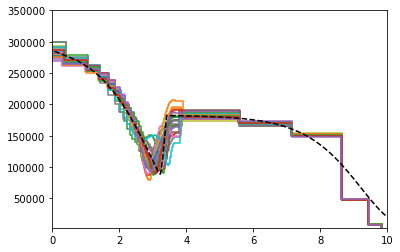

In [1]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])

seq_len = 50000000 
sam_size = 100000

pop_size_con = 50000
r_con = 10**(-8)

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########


c_value = 0.65*10**(-1)
c1=0

totaliter=25

numtildet = 100


########################## Demographic model #########################################

pop_ini_size = 150000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.05])
demo_model.add_population_parameters_change(25,  initial_size=None, growth_rate=-0.15, population=None)
demo_model.add_population_parameters_change(30,  initial_size=None, growth_rate=1*10**(-4), population=None)


############################## r map ######################################

r_map = 10**(-8)


############################ mu map         ###################################
################################################################################
mu_map = 1.3*10**(-8)



################################################################################




lamd = []
Ntlist = []
investlist = []

sum_time = 0
for it in range(totaliter):

    s_time_sim_data = time.time()
    
####### observe #########
    ts1 = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_map, 
        sequence_length= seq_len,
#         population_size = pop_size,
#         gene_conversion_rate = gene_conver ,
#         gene_conversion_tract_length = track_len,
        #random_seed = seed,
#         discrete_genome=False,
        demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                discrete_genome=False,
                                #random_seed=seed
                               )

    #print(iter,"done generating")

    
    e_time_sim_data = time.time()
    print('done simulate data', e_time_sim_data-s_time_sim_data)
    
    s_time = time.time()
    
    if mu_map_unknown == 1:
        site_pos_sort = mts1.tables.sites.position
        aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
        mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())

    

    if isinstance(mu_map, float) ==1:
        seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
        seq_bp.append(seq_len)
        seq_bp=numpy.array(seq_bp)
    else:
        seq_bp = [0]
        current_seq_site = 0
        need_cum_rate = c_value
        for i in range(len(mu_map.right)):
            current_mu_change_point = mu_map.right[i]
            current_mu_map_rate = mu_map.rate[i]
            while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                current_seq_site = seq_bp[-1]
                need_cum_rate = c_value
            need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
            current_seq_site = current_mu_change_point
        if seq_bp[-1] != seq_len:
            seq_bp.append(seq_len)
        seq_bp = numpy.array(seq_bp)


                  ###### Compute the weighted average mu of each interval ###########
    mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )

    ################################################################################    
    
    e_time_mu = time.time()
    print("done compute mu map and mu in length interval", e_time_mu-s_time)

    ts = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_con, 
        sequence_length= seq_len,
        population_size = pop_size_con,
#         random_seed =simtree+1026,
#         discrete_genome=False,
        #demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts = msprime.sim_mutations(ts, rate = mu_map,
                                discrete_genome=False,
#                                 random_seed=simtree+1026
                               )

    #print(iter,"done generating")
    
    e_time_null_sim = time.time()
    print("done null simulation", e_time_null_sim-s_time)
    
    
    
    s_time_xmat_ymat = time.time()


    #### new improvement ######################################### 

    mu_time = mts.tables.mutations.time
#     mu_site_id = mts.tables.mutations.site
#     mu_site = mts.tables.sites.position[mu_site_id]
#     mu_node = mts.tables.mutations.node
    mufreq = numpy.zeros(len(mu_time))
#     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     current_seq_int = 0
#     current_site = seq_bp[0]
#     current_interval_r = seq_bp[1]
#     current_rate_nomu = numpy.zeros(2*sam_size-1)
    freqtime = mu_time


    #####################################################
    ######################################################
    ######################################################
    ######################################################
    #####################################################



#     tildetcheckm1 = []
#     for i in range(1,numtildet-1):
#         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
#     tildetcheck = tildetcheckm1 + [max(freqtime)]

# #   自己决定tildetcheck    
#     tildetcheck = numpy.linspace(0.2,4.8,24).tolist() + numpy.linspace(5,24,20).tolist()+ \
#             numpy.linspace(25,200,10).tolist()+ numpy.linspace(1200,30200,30).tolist()
#     if tildetcheck[-1] < max(freqtime):
#         tildetcheck = tildetcheck+[max(freqtime)]

#   自己决定tildetcheck    
    tildetcheck = numpy.linspace(0.5,25,50).tolist() + (30*numpy.exp(numpy.arange(0,20.1,4)*0.4)).tolist()
    if tildetcheck[-1] < max(freqtime):
        tildetcheck = tildetcheck+[max(freqtime)]




    time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

    mu_index = 0
    for tree in mts.trees():
        for each_mu in tree.mutations():
            mufreq[mu_index] = tree.num_samples(each_mu.node)
            mu_index = mu_index+1
        


#         ## pairs (i, i+1)
#         tree_high = numpy.zeros(2*sam_size-1)
#         for i in range(2*sam_size-1):
#             ## pairs (i, i+1)
#             tree_high[i] = 2*tree.tmrca(i,i+1)     
#         tree_lp = tree.interval[0]
#         tree_rp = tree.interval[1]


#         while tree_rp >= current_interval_r:
#             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
#                                                                     tree_high*(current_interval_r - current_site)
#             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
#                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
#             if isinstance(mu_map, float) ==1 :
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
#             else:
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
#             current_site = current_interval_r
#             current_rate_nomu = numpy.zeros(2*sam_size-1)
#             if current_site != seq_bp[-1]:
#                 current_seq_int = current_seq_int+1
#                 current_interval_r = seq_bp[current_seq_int+1]
#             else:
#                 break


#         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
#         current_site = tree_rp

#     ############################################################################ 

#     if len(mufreq) != len(freqtime):
#         print("something is wrong")
#     print("done2") 

    ############################################################################ 


    nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]

    #########################################################################################



    ##############################################################################################




    freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
    freqtimes = freqtsortbytime[0]
    mufreqs = freqtsortbytime[1]

    tinterval = numpy.zeros(len(freqtimes))
    curint = 0
    tiltind = 0
    curtimett = tildetcheck[tiltind]
    print("len fretimes", len(freqtimes))
    for i in range(len(freqtimes)):
        if freqtimes[i] <= curtimett:
            tinterval[i] = curint
        else:
            tiltind = tiltind + 1
            curtimett = tildetcheck[tiltind]
            while curtimett<freqtimes[i]:
                curint = curint + 1
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]

            curint = curint + 1
            tinterval[i] = curint

    tinterval = tinterval.astype(int)
    ##############################################################

#     ####### new improvement ############

#     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
#     for i in range(2*sam_size-1):
#         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
#                                                     windows = seq_bp, span_normalise=False)
#         current_afs = current_afs_all[:,1]
#         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
#         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

#     print("done2")     


#     afs_sort = numpy.sort(afs)
#     sortindex = numpy.argsort(rate_mu)
#     rate_mu_sort = rate_mu[sortindex]
#     timevec_all_sort = timevec_all[sortindex]

    #############################################################################################
    ##############################################################################################


    Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
    Xmat = Xmat.astype("float64")

    infreqint = numpy.zeros(len(mufreqs))
    for i in range(len(mufreqs)):
        infreqint[i] =  mufreqs[i]-1 
    infreqint = infreqint.astype(int)

    lenf = len(nummuwithin_obs)
    print("len mufreqs", len(mufreqs))
    for i in range(len(mufreqs)):
        a1 = infreqint[i] 
        a2 = tinterval[i]
        if a1 < lenf:
            Xmat[a1][a2] = Xmat[a1][a2] + 1


    Ymat = numpy.array(nummuwithin_obs)
    Ymat = Ymat.astype("float64")


    ####### new improvement ############

#     ####### new improvement ############


#     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
#     for i in range(len(timevec_all_sort)):
#         current_time = timevec_all_sort[i]
#         current_rate = rate_mu_sort[i]
#         index = find_s_s(current_time,time_bp)
#         if index==0:
#             Xmat_new[i,index] = current_rate
#         else:
#             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
#             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
#             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

#     #### density deconvolution
#     Ymat_obs = afs_sort        
#     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
#     den_mean = numpy.zeros(len(yvec))
#     den_obs = numpy.zeros(len(yvec))
#     for i in range(len(yvec)):
#         val = yvec[i]
#         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
#     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
#     for i in range(len(find_den_x_mat)):
#         val = yvec[i]
#         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
#     find_den_y_mat = den_obs
#     lm = LinearRegression(fit_intercept=False,positive = True)
#     lm.fit(find_den_x_mat,find_den_y_mat)    
#     den_mean = lm.coef_
#     cdf_mean = numpy.cumsum(den_mean)
#     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
#     Ymat_new = numpy.zeros(len(Xmat_new))
#     for i in range(len(quan_vec)):
#         yloc = find_s_s(quan_vec[i],cdf_mean)
#         if yloc==0:
#             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
#         elif yloc == len(cdf_mean):
#             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
#         else:
#             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



#     #     Xmat_new = Xmat_new[0:3000]
#     #     Ymat_new = Ymat_new[0:3000]

#     ##############################################################################################





    ####### combine #############################################################

#     ####### weight Xmat_new so that it has equal importance to Xmat

#     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
#     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )

    
    Xmat = Xmat[1:]
    Ymat = Ymat[1:]

#     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
#     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
    Xmat_combine = Xmat
    Ymat_combine = Ymat

    e_time_xmat_ymat = time.time()

    print(    e_time_xmat_ymat -     s_time_xmat_ymat )

    
    
    


    s_time_reg = time.time()
    
    ## weighted least square
    Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
    Yfit = numpy.zeros(len(Ymat_combine))
    for i in range(len(Ymat_combine)):
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
        Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




    ########################### penalyse difference of slopes ######

    current_lambda = 1*10**2.5

    PXmat = numpy.zeros((len(Xmat_combine[0])-2, len(Xmat_combine[0]) ))


    It_list = numpy.array(tildetcheck)
    It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

    ### weighting beta by time gap ########################
    for i in range(len(PXmat)):
        PXmat[i,i] =  numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i] + It_list[i+1]) )
        PXmat[i,i+1] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*(-1/(0.5*(It_list[i] + It_list[i+1]) ) - 1/(0.5*(It_list[i+1] + It_list[i+2]) ) ) 
        PXmat[i,i+2] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i+1] + It_list[i+2]) )

    PYmat = numpy.zeros(len(Xmat_combine[0])-2)

    Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
    Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

    fitmodel = LinearRegression(fit_intercept=False,positive = True)

    fitmodel.fit(Xfit1,Yfit1)    
    sol = fitmodel.coef_

    # correct the last term:
    sol[-1]= 0.5*(It_list[i+1] + It_list[i+1])*(1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-2] \
                                                + 1/(0.5*(It_list[i+1] + It_list[i+1]) )*sol[-2]\
                                                - 1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-3]  )

    #############################

    rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
    aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
    bb= numpy.linalg.inv(aa)
    cc = numpy.matmul(Xfit,bb)
    df = sum(sum(cc*Xfit))
    bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
    print("BIC: ",bic)

    #############################



    tcheck = [sol[0]*tildetcheck[0] ]
    for i in range(1,len(tildetcheck)):
        tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

    #############################################################################

    invest = []
    invest.append(0)
    Nt = []
    for i in range(len(tcheck)-1):
        Nt.append(sol[i]*pop_size_con*2)
        Nt.append(sol[i]*pop_size_con*2)
        invest.append(tcheck[i])
        invest.append(tcheck[i])
    Nt.append(sol[-1]*pop_size_con*2)
    Nt.append(sol[-1]*pop_size_con*2)
    invest.append(tcheck[-1])


    Ntlist.append(Nt)  
    investlist.append(invest)
    print("all done")

    e_time = time.time()

    sum_time = sum_time + e_time-s_time    
    
    e_time_reg = time.time()
    
    print("all done",it, e_time_reg-s_time_reg)

ave_time = sum_time/totaliter
print("average time", ave_time)

name = "Model7_ave_time_approach12.dat"
file = open(name,"wb") 
pickle.dump(ave_time,file)
file.close()   

name = "Model7_Ntlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(Ntlist,file)
file.close()

name = "Model7_investlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(investlist,file)
file.close()

name = "Model7_lambda_approach12.dat"
file = open(name,"wb") 
pickle.dump(lamd,file)
file.close()



    



for i in range(len(Ntlist)):
    investlist[i][0]=0.001
    plt.plot(numpy.log(investlist[i]),Ntlist[i])

x1 = numpy.linspace(0.1,200,200)
x2 = numpy.linspace(205,50000,500)
x = numpy.array(x1.tolist()+x2.tolist())

y = numpy.zeros(len(x))

for i in range(len(x)):
    if x[i] <= 25:
        y[i] = 300000*numpy.exp(-0.05*x[i])
    elif x[i] <=30:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( x[i]-25)*0.15)
    else:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( x[i]-30)*(-0.0001) )

        
plt.plot(numpy.log(x),y,'k--')



plt.xlim(0,10)
plt.ylim(3000,350000)




done simulate data 436.3948311805725
done compute mu map and mu in length interval 0.050522565841674805
done null simulation 295.5891025066376
len fretimes 1662105
len mufreqs 1662105
19.64010262489319
BIC:  -79134.26456461198
all done
average time 319.05544352531433
all done 0 3.8269548416137695
done simulate data 457.5221424102783
done compute mu map and mu in length interval 0.05178332328796387
done null simulation 268.894305229187
len fretimes 1662248
len mufreqs 1662248
18.74012804031372
BIC:  -67502.60565442634
all done
average time 610.3051900863647
all done 1 3.6165106296539307
done simulate data 373.6098508834839
done compute mu map and mu in length interval 0.04750490188598633
done null simulation 274.6754877567291
len fretimes 1666435
len mufreqs 1666435
18.850525617599487
BIC:  -57746.606463729084
all done
average time 907.5203356742859
all done 2 3.690579891204834
done simulate data 380.1352822780609
done compute mu map and mu in length interval 0.04696226119995117
done nu

(3000.0, 350000.0)

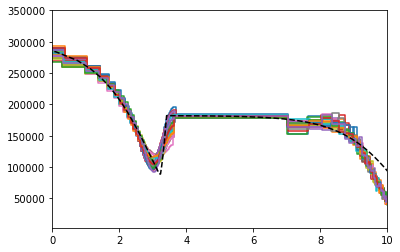

In [1]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])

seq_len = 50000000 
sam_size = 100000

pop_size_con = 50000
r_con = 10**(-8)

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########


c_value = 0.65*10**(-1)
c1=0

totaliter=25

numtildet = 100


########################## Demographic model #########################################

pop_ini_size = 150000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.05])
demo_model.add_population_parameters_change(25,  initial_size=None, growth_rate=-0.15, population=None)
demo_model.add_population_parameters_change(30,  initial_size=None, growth_rate=3*10**(-5), population=None)


############################## r map ######################################

r_map = 10**(-8)


############################ mu map         ###################################
################################################################################
mu_map = 1.3*10**(-8)



################################################################################




lamd = []
Ntlist = []
investlist = []

sum_time = 0
for it in range(totaliter):

    s_time_sim_data = time.time()
    
####### observe #########
    ts1 = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_map, 
        sequence_length= seq_len,
#         population_size = pop_size,
#         gene_conversion_rate = gene_conver ,
#         gene_conversion_tract_length = track_len,
        #random_seed = seed,
#         discrete_genome=False,
        demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                discrete_genome=False,
                                #random_seed=seed
                               )

    #print(iter,"done generating")

    
    e_time_sim_data = time.time()
    print('done simulate data', e_time_sim_data-s_time_sim_data)
    
    s_time = time.time()
    
    if mu_map_unknown == 1:
        site_pos_sort = mts1.tables.sites.position
        aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
        mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())

    

    if isinstance(mu_map, float) ==1:
        seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
        seq_bp.append(seq_len)
        seq_bp=numpy.array(seq_bp)
    else:
        seq_bp = [0]
        current_seq_site = 0
        need_cum_rate = c_value
        for i in range(len(mu_map.right)):
            current_mu_change_point = mu_map.right[i]
            current_mu_map_rate = mu_map.rate[i]
            while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                current_seq_site = seq_bp[-1]
                need_cum_rate = c_value
            need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
            current_seq_site = current_mu_change_point
        if seq_bp[-1] != seq_len:
            seq_bp.append(seq_len)
        seq_bp = numpy.array(seq_bp)


                  ###### Compute the weighted average mu of each interval ###########
    mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )

    ################################################################################    
    
    e_time_mu = time.time()
    print("done compute mu map and mu in length interval", e_time_mu-s_time)

    ts = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_con, 
        sequence_length= seq_len,
        population_size = pop_size_con,
#         random_seed =simtree+1026,
#         discrete_genome=False,
        #demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts = msprime.sim_mutations(ts, rate = mu_map,
                                discrete_genome=False,
#                                 random_seed=simtree+1026
                               )

    #print(iter,"done generating")
    
    e_time_null_sim = time.time()
    print("done null simulation", e_time_null_sim-s_time)
    
    
    
    s_time_xmat_ymat = time.time()


    #### new improvement ######################################### 

    mu_time = mts.tables.mutations.time
#     mu_site_id = mts.tables.mutations.site
#     mu_site = mts.tables.sites.position[mu_site_id]
#     mu_node = mts.tables.mutations.node
    mufreq = numpy.zeros(len(mu_time))
#     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     current_seq_int = 0
#     current_site = seq_bp[0]
#     current_interval_r = seq_bp[1]
#     current_rate_nomu = numpy.zeros(2*sam_size-1)
    freqtime = mu_time


    #####################################################
    ######################################################
    ######################################################
    ######################################################
    #####################################################



#     tildetcheckm1 = []
#     for i in range(1,numtildet-1):
#         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
#     tildetcheck = tildetcheckm1 + [max(freqtime)]

# #   自己决定tildetcheck    
#     tildetcheck = numpy.linspace(0.2,4.8,24).tolist() + numpy.linspace(5,24,20).tolist()+ \
#             numpy.linspace(25,200,10).tolist()+ numpy.linspace(1200,30200,30).tolist()
#     if tildetcheck[-1] < max(freqtime):
#         tildetcheck = tildetcheck+[max(freqtime)]

#   自己决定tildetcheck    
    tildetcheck = numpy.linspace(0.5,25,50).tolist() + numpy.linspace(625,30625,51).tolist()
    if tildetcheck[-1] < max(freqtime):
        tildetcheck = tildetcheck+[max(freqtime)]




    time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

    mu_index = 0
    for tree in mts.trees():
        for each_mu in tree.mutations():
            mufreq[mu_index] = tree.num_samples(each_mu.node)
            mu_index = mu_index+1
        


#         ## pairs (i, i+1)
#         tree_high = numpy.zeros(2*sam_size-1)
#         for i in range(2*sam_size-1):
#             ## pairs (i, i+1)
#             tree_high[i] = 2*tree.tmrca(i,i+1)     
#         tree_lp = tree.interval[0]
#         tree_rp = tree.interval[1]


#         while tree_rp >= current_interval_r:
#             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
#                                                                     tree_high*(current_interval_r - current_site)
#             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
#                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
#             if isinstance(mu_map, float) ==1 :
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
#             else:
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
#             current_site = current_interval_r
#             current_rate_nomu = numpy.zeros(2*sam_size-1)
#             if current_site != seq_bp[-1]:
#                 current_seq_int = current_seq_int+1
#                 current_interval_r = seq_bp[current_seq_int+1]
#             else:
#                 break


#         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
#         current_site = tree_rp

#     ############################################################################ 

#     if len(mufreq) != len(freqtime):
#         print("something is wrong")
#     print("done2") 

    ############################################################################ 


    nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]

    #########################################################################################



    ##############################################################################################




    freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
    freqtimes = freqtsortbytime[0]
    mufreqs = freqtsortbytime[1]

    tinterval = numpy.zeros(len(freqtimes))
    curint = 0
    tiltind = 0
    curtimett = tildetcheck[tiltind]
    print("len fretimes", len(freqtimes))
    for i in range(len(freqtimes)):
        if freqtimes[i] <= curtimett:
            tinterval[i] = curint
        else:
            tiltind = tiltind + 1
            curtimett = tildetcheck[tiltind]
            while curtimett<freqtimes[i]:
                curint = curint + 1
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]

            curint = curint + 1
            tinterval[i] = curint

    tinterval = tinterval.astype(int)
    ##############################################################

#     ####### new improvement ############

#     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
#     for i in range(2*sam_size-1):
#         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
#                                                     windows = seq_bp, span_normalise=False)
#         current_afs = current_afs_all[:,1]
#         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
#         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

#     print("done2")     


#     afs_sort = numpy.sort(afs)
#     sortindex = numpy.argsort(rate_mu)
#     rate_mu_sort = rate_mu[sortindex]
#     timevec_all_sort = timevec_all[sortindex]

    #############################################################################################
    ##############################################################################################


    Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
    Xmat = Xmat.astype("float64")

    infreqint = numpy.zeros(len(mufreqs))
    for i in range(len(mufreqs)):
        infreqint[i] =  mufreqs[i]-1 
    infreqint = infreqint.astype(int)

    lenf = len(nummuwithin_obs)
    print("len mufreqs", len(mufreqs))
    for i in range(len(mufreqs)):
        a1 = infreqint[i] 
        a2 = tinterval[i]
        if a1 < lenf:
            Xmat[a1][a2] = Xmat[a1][a2] + 1


    Ymat = numpy.array(nummuwithin_obs)
    Ymat = Ymat.astype("float64")


    ####### new improvement ############

#     ####### new improvement ############


#     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
#     for i in range(len(timevec_all_sort)):
#         current_time = timevec_all_sort[i]
#         current_rate = rate_mu_sort[i]
#         index = find_s_s(current_time,time_bp)
#         if index==0:
#             Xmat_new[i,index] = current_rate
#         else:
#             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
#             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
#             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

#     #### density deconvolution
#     Ymat_obs = afs_sort        
#     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
#     den_mean = numpy.zeros(len(yvec))
#     den_obs = numpy.zeros(len(yvec))
#     for i in range(len(yvec)):
#         val = yvec[i]
#         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
#     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
#     for i in range(len(find_den_x_mat)):
#         val = yvec[i]
#         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
#     find_den_y_mat = den_obs
#     lm = LinearRegression(fit_intercept=False,positive = True)
#     lm.fit(find_den_x_mat,find_den_y_mat)    
#     den_mean = lm.coef_
#     cdf_mean = numpy.cumsum(den_mean)
#     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
#     Ymat_new = numpy.zeros(len(Xmat_new))
#     for i in range(len(quan_vec)):
#         yloc = find_s_s(quan_vec[i],cdf_mean)
#         if yloc==0:
#             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
#         elif yloc == len(cdf_mean):
#             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
#         else:
#             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



#     #     Xmat_new = Xmat_new[0:3000]
#     #     Ymat_new = Ymat_new[0:3000]

#     ##############################################################################################





    ####### combine #############################################################

#     ####### weight Xmat_new so that it has equal importance to Xmat

#     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
#     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )

    
    Xmat = Xmat[1:]
    Ymat = Ymat[1:]

#     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
#     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
    Xmat_combine = Xmat
    Ymat_combine = Ymat

    e_time_xmat_ymat = time.time()

    print(    e_time_xmat_ymat -     s_time_xmat_ymat )

    
    
    


    s_time_reg = time.time()
    
    ## weighted least square
    Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
    Yfit = numpy.zeros(len(Ymat_combine))
    for i in range(len(Ymat_combine)):
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
        Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




    ########################### penalyse difference of slopes ######

    current_lambda = 1*10**3.5

    PXmat = numpy.zeros((len(Xmat_combine[0])-2, len(Xmat_combine[0]) ))


    It_list = numpy.array(tildetcheck)
    It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

    ### weighting beta by time gap ########################
    for i in range(len(PXmat)):
        PXmat[i,i] =  numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i] + It_list[i+1]) )
        PXmat[i,i+1] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*(-1/(0.5*(It_list[i] + It_list[i+1]) ) - 1/(0.5*(It_list[i+1] + It_list[i+2]) ) ) 
        PXmat[i,i+2] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i+1] + It_list[i+2]) )

    PYmat = numpy.zeros(len(Xmat_combine[0])-2)

    Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
    Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

    fitmodel = LinearRegression(fit_intercept=False,positive = True)

    fitmodel.fit(Xfit1,Yfit1)    
    sol = fitmodel.coef_

    # correct the last term:
    sol[-1]= 0.5*(It_list[i+1] + It_list[i+1])*(1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-2] \
                                                + 1/(0.5*(It_list[i+1] + It_list[i+1]) )*sol[-2]\
                                                - 1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-3]  )

    #############################

    rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
    aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
    bb= numpy.linalg.inv(aa)
    cc = numpy.matmul(Xfit,bb)
    df = sum(sum(cc*Xfit))
    bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
    print("BIC: ",bic)

    #############################



    tcheck = [sol[0]*tildetcheck[0] ]
    for i in range(1,len(tildetcheck)):
        tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

    #############################################################################

    invest = []
    invest.append(0)
    Nt = []
    for i in range(len(tcheck)-1):
        Nt.append(sol[i]*pop_size_con*2)
        Nt.append(sol[i]*pop_size_con*2)
        invest.append(tcheck[i])
        invest.append(tcheck[i])
    Nt.append(sol[-1]*pop_size_con*2)
    Nt.append(sol[-1]*pop_size_con*2)
    invest.append(tcheck[-1])


    Ntlist.append(Nt)  
    investlist.append(invest)
    print("all done")

    e_time = time.time()

    sum_time = sum_time + e_time-s_time    

ave_time = sum_time/totaliter
print("average time", ave_time)

name = "Model7_ave_time_approach12.dat"
file = open(name,"wb") 
pickle.dump(ave_time,file)
file.close()   

name = "Model7_Ntlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(Ntlist,file)
file.close()

name = "Model7_investlist_approach12.dat"
file = open(name,"wb") 
pickle.dump(investlist,file)
file.close()

name = "Model7_lambda_approach12.dat"
file = open(name,"wb") 
pickle.dump(lamd,file)
file.close()

e_time_reg = time.time()

print("all done",it, e_time_reg-s_time_reg)

    



for i in range(len(Ntlist)):
    investlist[i][0]=0.001
    plt.plot(numpy.log(investlist[i]),Ntlist[i])

x1 = numpy.linspace(0.1,200,200)
x2 = numpy.linspace(205,50000,500)
x = numpy.array(x1.tolist()+x2.tolist())

y = numpy.zeros(len(x))

for i in range(len(x)):
    if x[i] <= 25:
        y[i] = 300000*numpy.exp(-0.05*x[i])
    elif x[i] <=30:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( x[i]-25)*0.15)
    else:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( x[i]-30)*(-0.00003) )

        
plt.plot(numpy.log(x),y,'k--')



plt.xlim(0,10)
plt.ylim(3000,350000)




done simulate data 561.5813503265381
done compute mu map and mu in length interval 0.04556417465209961
done null simulation 281.40451073646545
len fretimes 1655475
len mufreqs 1655475
19.447455406188965
BIC:  3685.103555112713
all done
average time 304.6915090084076


(3000.0, 350000.0)

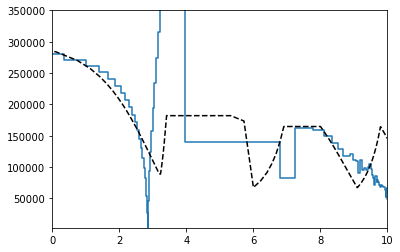

In [2]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time




import bisect
def find_s(elem, sorted_list):
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i


def find_s_se(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_right(sorted_list, elem)
    if i != 0:
        return i-1
    else:
        print("error")


def find_s_s(elem, sorted_list):
    'Locate the leftmost value smaller or equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != 0:
        return i
    else:
        return 0
    
def est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len):
    inter = numpy.linspace(0,seq_len,est_mu_map_num_inter+1)
    cur_num_l = 0
    num_mu_int = numpy.zeros(len(inter)-1)
    for k in range(1,len(inter)):
        cur_num_r = find_s_s(inter[k], site_pos_sort )
        num_mu_int[k-1] = cur_num_r-cur_num_l
        cur_num_l = cur_num_r
    est_mu_rate = num_mu_int/( inter[1:] - inter[0: (len(inter)-1)]   )   
    est_mu_rate = est_mu_rate/sum(est_mu_rate)*mu_ave*est_mu_map_num_inter
    return([inter,est_mu_rate])

seq_len = 50000000 
sam_size = 100000

pop_size_con = 50000
r_con = 10**(-8)

########
mu_map_unknown = 1
mu_ave = 1.3*10**(-8)
est_mu_map_num_inter = 10
##########


c_value = 0.65*10**(-1)
c1=0

totaliter=1

numtildet = 100


########################## Demographic model #########################################

pop_ini_size = 150000
demo_model = msprime.Demography.isolated_model([pop_ini_size], growth_rate=[0.05])
demo_model.add_population_parameters_change(25,  initial_size=None, growth_rate=-0.15, population=None)
demo_model.add_population_parameters_change(30,  initial_size=None, growth_rate=0, population=None)
demo_model.add_population_parameters_change(300,  initial_size=None, growth_rate=0.01, population=None)
demo_model.add_population_parameters_change(400,  initial_size=None, growth_rate=-0.0015, population=None)
demo_model.add_population_parameters_change(1000,  initial_size=None, growth_rate=0, population=None)
demo_model.add_population_parameters_change(3000,  initial_size=None, growth_rate=0.00015, population=None)
demo_model.add_population_parameters_change(9000,  initial_size=None, growth_rate=-0.0001, population=None)
demo_model.add_population_parameters_change(18000,  initial_size=None, growth_rate=3*10**(-5), population=None)





############################## r map ######################################

r_map = 10**(-8)


############################ mu map         ###################################
################################################################################
mu_map = 1.3*10**(-8)







lamd = []
Ntlist = []
investlist = []

sum_time = 0
for it in range(totaliter):

    s_time_sim_data = time.time()
    
####### observe #########
    ts1 = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_map, 
        sequence_length= seq_len,
#         population_size = pop_size,
#         gene_conversion_rate = gene_conver ,
#         gene_conversion_tract_length = track_len,
        #random_seed = seed,
#         discrete_genome=False,
        demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts1 = msprime.sim_mutations(ts1, rate = mu_map,
                                discrete_genome=False,
                                #random_seed=seed
                               )

    #print(iter,"done generating")

    
    e_time_sim_data = time.time()
    print('done simulate data', e_time_sim_data-s_time_sim_data)
    
    s_time = time.time()
    
    if mu_map_unknown == 1:
        site_pos_sort = mts1.tables.sites.position
        aa = est_mu_map_fun(mu_ave,site_pos_sort,est_mu_map_num_inter,seq_len)
        mu_map = msprime.RateMap(position=aa[0].tolist(), rate=aa[1].tolist())

    

    if isinstance(mu_map, float) ==1:
        seq_bp = [*range(0,seq_len, int(c_value/mu_map) )]
        seq_bp.append(seq_len)
        seq_bp=numpy.array(seq_bp)
    else:
        seq_bp = [0]
        current_seq_site = 0
        need_cum_rate = c_value
        for i in range(len(mu_map.right)):
            current_mu_change_point = mu_map.right[i]
            current_mu_map_rate = mu_map.rate[i]
            while need_cum_rate/current_mu_map_rate <= (current_mu_change_point - current_seq_site):
                seq_bp.append(current_seq_site + need_cum_rate/current_mu_map_rate)
                current_seq_site = seq_bp[-1]
                need_cum_rate = c_value
            need_cum_rate = need_cum_rate - (current_mu_change_point - current_seq_site)*current_mu_map_rate
            current_seq_site = current_mu_change_point
        if seq_bp[-1] != seq_len:
            seq_bp.append(seq_len)
        seq_bp = numpy.array(seq_bp)


                  ###### Compute the weighted average mu of each interval ###########
    mu_in_interval = c_value / ( seq_bp[1:] - seq_bp[0:(len(seq_bp)-1)] )

    ################################################################################    
    
    e_time_mu = time.time()
    print("done compute mu map and mu in length interval", e_time_mu-s_time)

    ts = msprime.sim_ancestry(
        samples=sam_size,
        recombination_rate= r_con, 
        sequence_length= seq_len,
        population_size = pop_size_con,
#         random_seed =simtree+1026,
#         discrete_genome=False,
        #demography = demo_model
        )
    # Visualise the simulated ancestral history.
    #SVG(ts.draw_svg())

    #ts.num_trees


    mts = msprime.sim_mutations(ts, rate = mu_map,
                                discrete_genome=False,
#                                 random_seed=simtree+1026
                               )

    #print(iter,"done generating")
    
    e_time_null_sim = time.time()
    print("done null simulation", e_time_null_sim-s_time)
    
    
    
    s_time_xmat_ymat = time.time()


    #### new improvement ######################################### 

    mu_time = mts.tables.mutations.time
#     mu_site_id = mts.tables.mutations.site
#     mu_site = mts.tables.sites.position[mu_site_id]
#     mu_node = mts.tables.mutations.node
    mufreq = numpy.zeros(len(mu_time))
#     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     current_seq_int = 0
#     current_site = seq_bp[0]
#     current_interval_r = seq_bp[1]
#     current_rate_nomu = numpy.zeros(2*sam_size-1)
    freqtime = mu_time


    #####################################################
    ######################################################
    ######################################################
    ######################################################
    #####################################################



#     tildetcheckm1 = []
#     for i in range(1,numtildet-1):
#         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
#     tildetcheck = tildetcheckm1 + [max(freqtime)]

#   自己决定tildetcheck    
    tildetcheck = numpy.exp( numpy.arange(0.1,11,0.1) ).tolist()
    if tildetcheck[-1] < max(freqtime):
        tildetcheck = tildetcheck+[max(freqtime)]




    time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

    mu_index = 0
    for tree in mts.trees():
        for each_mu in tree.mutations():
            mufreq[mu_index] = tree.num_samples(each_mu.node)
            mu_index = mu_index+1
        


#         ## pairs (i, i+1)
#         tree_high = numpy.zeros(2*sam_size-1)
#         for i in range(2*sam_size-1):
#             ## pairs (i, i+1)
#             tree_high[i] = 2*tree.tmrca(i,i+1)     
#         tree_lp = tree.interval[0]
#         tree_rp = tree.interval[1]


#         while tree_rp >= current_interval_r:
#             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
#                                                                     tree_high*(current_interval_r - current_site)
#             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
#                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
#             if isinstance(mu_map, float) ==1 :
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
#             else:
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
#             current_site = current_interval_r
#             current_rate_nomu = numpy.zeros(2*sam_size-1)
#             if current_site != seq_bp[-1]:
#                 current_seq_int = current_seq_int+1
#                 current_interval_r = seq_bp[current_seq_int+1]
#             else:
#                 break


#         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
#         current_site = tree_rp

#     ############################################################################ 

#     if len(mufreq) != len(freqtime):
#         print("something is wrong")
#     print("done2") 

    ############################################################################ 


    nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]

    #########################################################################################



    ##############################################################################################




    freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
    freqtimes = freqtsortbytime[0]
    mufreqs = freqtsortbytime[1]

    tinterval = numpy.zeros(len(freqtimes))
    curint = 0
    tiltind = 0
    curtimett = tildetcheck[tiltind]
    print("len fretimes", len(freqtimes))
    for i in range(len(freqtimes)):
        if freqtimes[i] <= curtimett:
            tinterval[i] = curint
        else:
            tiltind = tiltind + 1
            curtimett = tildetcheck[tiltind]
            while curtimett<freqtimes[i]:
                curint = curint + 1
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]

            curint = curint + 1
            tinterval[i] = curint

    tinterval = tinterval.astype(int)
    ##############################################################

#     ####### new improvement ############

#     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
#     for i in range(2*sam_size-1):
#         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
#                                                     windows = seq_bp, span_normalise=False)
#         current_afs = current_afs_all[:,1]
#         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
#         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

#     print("done2")     


#     afs_sort = numpy.sort(afs)
#     sortindex = numpy.argsort(rate_mu)
#     rate_mu_sort = rate_mu[sortindex]
#     timevec_all_sort = timevec_all[sortindex]

    #############################################################################################
    ##############################################################################################


    Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
    Xmat = Xmat.astype("float64")

    infreqint = numpy.zeros(len(mufreqs))
    for i in range(len(mufreqs)):
        infreqint[i] =  mufreqs[i]-1 
    infreqint = infreqint.astype(int)

    lenf = len(nummuwithin_obs)
    print("len mufreqs", len(mufreqs))
    for i in range(len(mufreqs)):
        a1 = infreqint[i] 
        a2 = tinterval[i]
        if a1 < lenf:
            Xmat[a1][a2] = Xmat[a1][a2] + 1


    Ymat = numpy.array(nummuwithin_obs)
    Ymat = Ymat.astype("float64")


    ####### new improvement ############

#     ####### new improvement ############


#     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
#     for i in range(len(timevec_all_sort)):
#         current_time = timevec_all_sort[i]
#         current_rate = rate_mu_sort[i]
#         index = find_s_s(current_time,time_bp)
#         if index==0:
#             Xmat_new[i,index] = current_rate
#         else:
#             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
#             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
#             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

#     #### density deconvolution
#     Ymat_obs = afs_sort        
#     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
#     den_mean = numpy.zeros(len(yvec))
#     den_obs = numpy.zeros(len(yvec))
#     for i in range(len(yvec)):
#         val = yvec[i]
#         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
#     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
#     for i in range(len(find_den_x_mat)):
#         val = yvec[i]
#         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
#     find_den_y_mat = den_obs
#     lm = LinearRegression(fit_intercept=False,positive = True)
#     lm.fit(find_den_x_mat,find_den_y_mat)    
#     den_mean = lm.coef_
#     cdf_mean = numpy.cumsum(den_mean)
#     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
#     Ymat_new = numpy.zeros(len(Xmat_new))
#     for i in range(len(quan_vec)):
#         yloc = find_s_s(quan_vec[i],cdf_mean)
#         if yloc==0:
#             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
#         elif yloc == len(cdf_mean):
#             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
#         else:
#             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



#     #     Xmat_new = Xmat_new[0:3000]
#     #     Ymat_new = Ymat_new[0:3000]

#     ##############################################################################################





    ####### combine #############################################################

#     ####### weight Xmat_new so that it has equal importance to Xmat

#     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
#     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )

    
    Xmat = Xmat[1:]
    Ymat = Ymat[1:]

#     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
#     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
    Xmat_combine = Xmat
    Ymat_combine = Ymat

    e_time_xmat_ymat = time.time()

    print(    e_time_xmat_ymat -     s_time_xmat_ymat )

    
    
    


    s_time_reg = time.time()
    
    ## weighted least square
    Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
    Yfit = numpy.zeros(len(Ymat_combine))
    for i in range(len(Ymat_combine)):
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
        Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




    ########################### penalyse difference of slopes ######

    current_lambda = 1*10**2.5

    PXmat = numpy.zeros((len(Xmat_combine[0])-2, len(Xmat_combine[0]) ))


    It_list = numpy.array(tildetcheck)
    It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

    ### weighting beta by time gap ########################
    for i in range(len(PXmat)):
        PXmat[i,i] =  numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i] + It_list[i+1]) )
        PXmat[i,i+1] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*(-1/(0.5*(It_list[i] + It_list[i+1]) ) - 1/(0.5*(It_list[i+1] + It_list[i+2]) ) ) 
        PXmat[i,i+2] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i+1] + It_list[i+2]) )

    PYmat = numpy.zeros(len(Xmat_combine[0])-2)

    Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
    Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

    fitmodel = LinearRegression(fit_intercept=False,positive = True)

    fitmodel.fit(Xfit1,Yfit1)    
    sol = fitmodel.coef_

    # correct the last term:
    sol[-1]= 0.5*(It_list[i+1] + It_list[i+1])*(1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-2] \
                                                + 1/(0.5*(It_list[i+1] + It_list[i+1]) )*sol[-2]\
                                                - 1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-3]  )

    #############################

    rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
    aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
    bb= numpy.linalg.inv(aa)
    cc = numpy.matmul(Xfit,bb)
    df = sum(sum(cc*Xfit))
    bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
    print("BIC: ",bic)

    #############################



    tcheck = [sol[0]*tildetcheck[0] ]
    for i in range(1,len(tildetcheck)):
        tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

    #############################################################################

    invest = []
    invest.append(0)
    Nt = []
    for i in range(len(tcheck)-1):
        Nt.append(sol[i]*pop_size_con*2)
        Nt.append(sol[i]*pop_size_con*2)
        invest.append(tcheck[i])
        invest.append(tcheck[i])
    Nt.append(sol[-1]*pop_size_con*2)
    Nt.append(sol[-1]*pop_size_con*2)
    invest.append(tcheck[-1])


    Ntlist.append(Nt)  
    investlist.append(invest)
    print("all done")

    e_time = time.time()

    sum_time = sum_time + e_time-s_time    

    ave_time = sum_time
    print("average time", ave_time)

#     name = "Model7_ave_time_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(ave_time,file)
#     file.close()   

#     name = "Model7_Ntlist_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(Ntlist,file)
#     file.close()

#     name = "Model7_investlist_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(investlist,file)
#     file.close()

#     name = "Model7_lambda_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(lamd,file)
#     file.close()

#     e_time_reg = time.time()
    
#     print("all done",it, e_time_reg-s_time_reg)

    



for i in range(len(Ntlist)):
    investlist[i][0]=0.001
    plt.plot(numpy.log(investlist[i]),Ntlist[i])

x1 = numpy.linspace(0.1,200,200)
x2 = numpy.linspace(205,50000,500)
x = numpy.array(x1.tolist()+x2.tolist())

y = numpy.zeros(len(x))

for i in range(len(x)):
    if x[i] <= 25:
        y[i] = 300000*numpy.exp(-0.05*x[i])
    elif x[i] <=30:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( x[i]-25)*0.15)
    elif x[i] <= 300:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)
    elif x[i] <= 400:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( x[i]-300)*(-0.01))
    elif x[i] <= 1000:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
            *numpy.exp(( x[i]-400)*(0.0015))   
    elif x[i] <= 3000:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
            *numpy.exp(( 1000-400)*(0.0015)) 
    elif x[i] <= 9000:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
            *numpy.exp(( 1000-400)*(0.0015)) *numpy.exp(( x[i]-3000)*(-0.00015))
    elif x[i] <= 18000:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
            *numpy.exp(( 1000-400)*(0.0015)) *numpy.exp(( 9000-3000)*(-0.00015))*numpy.exp(( x[i]-9000)*(0.0001))
    else:
        y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
            *numpy.exp(( 1000-400)*(0.0015)) *numpy.exp(( 9000-3000)*(-0.00015))*numpy.exp(( 18000-9000)*(0.0001))\
            *numpy.exp(( x[i]-18000)*(-0.00003))
            
        

        
plt.plot(numpy.log(x),y,'k--')



plt.xlim(0,10)
plt.ylim(3000,350000)




len fretimes 1655475
len mufreqs 1655475
1859.0832786560059
BIC:  -83794.64187676675
all done
average time 2450.367391347885


(3000.0, 350000.0)

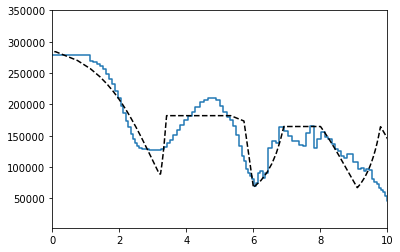

In [22]:
    lamd = []
    Ntlist = []
    investlist = []

#### new improvement ######################################### 

    mu_time = mts.tables.mutations.time
#     mu_site_id = mts.tables.mutations.site
#     mu_site = mts.tables.sites.position[mu_site_id]
#     mu_node = mts.tables.mutations.node
    mufreq = numpy.zeros(len(mu_time))
#     rate_nomu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     rate_mu = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     timevec_all = numpy.zeros( (len(seq_bp)-1)*(2*sam_size-1) )
#     current_seq_int = 0
#     current_site = seq_bp[0]
#     current_interval_r = seq_bp[1]
#     current_rate_nomu = numpy.zeros(2*sam_size-1)
    freqtime = mu_time


    #####################################################
    ######################################################
    ######################################################
    ######################################################
    #####################################################



#     tildetcheckm1 = []
#     for i in range(1,numtildet-1):
#         tildetcheckm1.append( numpy.sort(freqtime)[int(len(freqtime)/numtildet*i)])
#     tildetcheck = tildetcheckm1 + [max(freqtime)]


# #   自己决定tildetcheck    
#     tildetcheck = numpy.linspace(0.5,25,50).tolist() + numpy.linspace(625,30625,51).tolist()
#     if tildetcheck[-1] < max(freqtime):
#         tildetcheck = tildetcheck+[max(freqtime)]

#   自己决定tildetcheck    
    tildetcheck = numpy.exp( numpy.arange(0.1,11,0.1) ).tolist()
    if tildetcheck[-1] < max(freqtime):
        tildetcheck = tildetcheck+[max(freqtime)]
    

    time_bp = numpy.array(tildetcheck[0:(len(tildetcheck)-1) ] )   

    mu_index = 0
    for tree in mts.trees():
        for each_mu in tree.mutations():
            mufreq[mu_index] = tree.num_samples(each_mu.node)
            mu_index = mu_index+1
        


#         ## pairs (i, i+1)
#         tree_high = numpy.zeros(2*sam_size-1)
#         for i in range(2*sam_size-1):
#             ## pairs (i, i+1)
#             tree_high[i] = 2*tree.tmrca(i,i+1)     
#         tree_lp = tree.interval[0]
#         tree_rp = tree.interval[1]


#         while tree_rp >= current_interval_r:
#             rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = current_rate_nomu + \
#                                                                     tree_high*(current_interval_r - current_site)
#             timevec_all[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ]\
#                 /(seq_bp[current_seq_int+1] - seq_bp[current_seq_int] )/2
#             if isinstance(mu_map, float) ==1 :
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_map
#             else:
#                 rate_mu[ current_seq_int*(2*sam_size-1) : (current_seq_int+1)*(2*sam_size-1) ] = \
#                 rate_nomu[ current_seq_int*(2*sam_size-1) :(current_seq_int+1)*(2*sam_size-1) ]*mu_in_interval[current_seq_int]
#             current_site = current_interval_r
#             current_rate_nomu = numpy.zeros(2*sam_size-1)
#             if current_site != seq_bp[-1]:
#                 current_seq_int = current_seq_int+1
#                 current_interval_r = seq_bp[current_seq_int+1]
#             else:
#                 break


#         current_rate_nomu = current_rate_nomu + tree_high*(tree_rp - current_site)
#         current_site = tree_rp

#     ############################################################################ 

#     if len(mufreq) != len(freqtime):
#         print("something is wrong")
#     print("done2") 

    ############################################################################ 


    nummuwithin_obs =  mts1.allele_frequency_spectrum(polarised=True, span_normalise=False)[1:]

    #########################################################################################
    nummuwithin_obs= numpy.array(nummuwithin_obs) + numpy.array( numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) \
        -  numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) ) 
    nummuwithin_obs = nummuwithin_obs*(nummuwithin_obs>0)


    ##############################################################################################




    freqtsortbytime = numpy.transpose(sorted(numpy.transpose(numpy.array([freqtime,mufreq])).tolist()))
    freqtimes = freqtsortbytime[0]
    mufreqs = freqtsortbytime[1]

    tinterval = numpy.zeros(len(freqtimes))
    curint = 0
    tiltind = 0
    curtimett = tildetcheck[tiltind]
    print("len fretimes", len(freqtimes))
    for i in range(len(freqtimes)):
        if freqtimes[i] <= curtimett:
            tinterval[i] = curint
        else:
            tiltind = tiltind + 1
            curtimett = tildetcheck[tiltind]
            while curtimett<freqtimes[i]:
                curint = curint + 1
                tiltind = tiltind + 1
                curtimett = tildetcheck[tiltind]

            curint = curint + 1
            tinterval[i] = curint

    tinterval = tinterval.astype(int)
    ##############################################################

#     ####### new improvement ############

#     afs = numpy.zeros( (len(seq_bp)-1) *(2*sam_size-1) )
#     for i in range(2*sam_size-1):
#         current_afs_all = mts1.allele_frequency_spectrum(sample_sets = [[i,i+1]], polarised=True, \
#                                                     windows = seq_bp, span_normalise=False)
#         current_afs = current_afs_all[:,1]
#         index = i + numpy.array( [*range(len(seq_bp)-1)]) * (2*sam_size-1)
#         afs[index] = current_afs + numpy.random.poisson( ( seq_bp[1:]-seq_bp[:(len(seq_bp) -1)] )*epsilon*2 )

#     print("done2")     


#     afs_sort = numpy.sort(afs)
#     sortindex = numpy.argsort(rate_mu)
#     rate_mu_sort = rate_mu[sortindex]
#     timevec_all_sort = timevec_all[sortindex]

    #############################################################################################
    ##############################################################################################


    Xmat = numpy.zeros( (len(nummuwithin_obs),  max(tinterval)+1)   )
    Xmat = Xmat.astype("float64")

    infreqint = numpy.zeros(len(mufreqs))
    for i in range(len(mufreqs)):
        infreqint[i] =  mufreqs[i]-1 
    infreqint = infreqint.astype(int)

    lenf = len(nummuwithin_obs)
    print("len mufreqs", len(mufreqs))
    for i in range(len(mufreqs)):
        a1 = infreqint[i] 
        a2 = tinterval[i]
        if a1 < lenf:
            Xmat[a1][a2] = Xmat[a1][a2] + 1


    Ymat = numpy.array(nummuwithin_obs)
    Ymat = Ymat.astype("float64")


    ####### new improvement ############

#     ####### new improvement ############


#     Xmat_new = numpy.zeros((len(rate_mu_sort), len(time_bp)+1 )) 
#     for i in range(len(timevec_all_sort)):
#         current_time = timevec_all_sort[i]
#         current_rate = rate_mu_sort[i]
#         index = find_s_s(current_time,time_bp)
#         if index==0:
#             Xmat_new[i,index] = current_rate
#         else:
#             Xmat_new[i,0]  = current_rate * time_bp[0]/current_time
#             Xmat_new[i,1:index] = current_rate * (time_bp[1:index]-time_bp[0:(index-1)])/current_time
#             Xmat_new[i,index] = current_rate * (current_time - time_bp[index-1]) / current_time

#     #### density deconvolution
#     Ymat_obs = afs_sort        
#     yvec = numpy.arange(min(Ymat_obs) , min( min(Ymat_obs) +  len(Ymat_obs),  max(Ymat_obs)+1) )
#     den_mean = numpy.zeros(len(yvec))
#     den_obs = numpy.zeros(len(yvec))
#     for i in range(len(yvec)):
#         val = yvec[i]
#         den_obs[i] = ( find_s_s(val+1,Ymat_obs) - find_s_s(val,Ymat_obs) ) / len(Ymat_obs)
#     find_den_x_mat = numpy.zeros( (len(den_mean),len(yvec)) )
#     for i in range(len(find_den_x_mat)):
#         val = yvec[i]
#         find_den_x_mat[i] = scipy.stats.poisson.pmf(val,mu=yvec)
#     find_den_y_mat = den_obs
#     lm = LinearRegression(fit_intercept=False,positive = True)
#     lm.fit(find_den_x_mat,find_den_y_mat)    
#     den_mean = lm.coef_
#     cdf_mean = numpy.cumsum(den_mean)
#     quan_vec =  numpy.arange(1,len(Xmat_new)+1)   /(len(Xmat_new) +1 )
#     Ymat_new = numpy.zeros(len(Xmat_new))
#     for i in range(len(quan_vec)):
#         yloc = find_s_s(quan_vec[i],cdf_mean)
#         if yloc==0:
#             Ymat_new[i] = yvec[yloc ] + quan_vec[i]/(cdf_mean[yloc]  ) 
#         elif yloc == len(cdf_mean):
#             Ymat_new[i] = yvec[yloc-1] + (quan_vec[i]-cdf_mean[-1])/(1-cdf_mean[-1])
#         else:
#             Ymat_new[i] = yvec[yloc ] + (quan_vec[i] - cdf_mean[yloc-1])/(cdf_mean[yloc] - cdf_mean[yloc-1] ) 



#     #     Xmat_new = Xmat_new[0:3000]
#     #     Ymat_new = Ymat_new[0:3000]

#     ##############################################################################################





    ####### combine #############################################################

#     ####### weight Xmat_new so that it has equal importance to Xmat

#     Xmat_new = Xmat_new*numpy.sqrt( c1/len(Xmat_new) )
#     Ymat_new = Ymat_new*numpy.sqrt( c1/len(Ymat_new) )

    
    Xmat = Xmat[1:]
    Ymat = Ymat[1:]

#     Xmat_combine = numpy.concatenate((Xmat, Xmat_new), axis=0)
#     Ymat_combine = numpy.concatenate((Ymat, Ymat_new))
    Xmat_combine = Xmat
    Ymat_combine = Ymat

    e_time_xmat_ymat = time.time()

    print(    e_time_xmat_ymat -     s_time_xmat_ymat )

    
    
    


    s_time_reg = time.time()
    
    ## weighted least square
    Xfit = numpy.zeros( (len(Xmat_combine[:,0]),len(Xmat_combine[0,:]) ) )
    Yfit = numpy.zeros(len(Ymat_combine))
    for i in range(len(Ymat_combine)):
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)
    #         Xfit[i,:] = Xmat_combine[i,:]/(sum(Xmat_combine[i,:])+1)/(numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
    #         Yfit[i] = Ymat_combine[i]/(sum(Xmat_combine[i,:])+1)/ (numpy.sqrt( Ymat_combine[i]+1) / (sum(Xmat_combine[i,:])+1) )
        Xfit[i,:] = Xmat_combine[i,:]/numpy.sqrt(Ymat_combine[i]+1)
        Yfit[i] = Ymat_combine[i]/numpy.sqrt(Ymat_combine[i]+1)




    ########################### penalyse difference of slopes ######

    current_lambda = 1*10**2.5

    PXmat = numpy.zeros((len(Xmat_combine[0])-2, len(Xmat_combine[0]) ))


    It_list = numpy.array(tildetcheck)
    It_list[1:] = numpy.array(tildetcheck[1:])-numpy.array(tildetcheck[0:(len(tildetcheck)-1)])

    ### weighting beta by time gap ########################
    for i in range(len(PXmat)):
        PXmat[i,i] =  numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i] + It_list[i+1]) )
        PXmat[i,i+1] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*(-1/(0.5*(It_list[i] + It_list[i+1]) ) - 1/(0.5*(It_list[i+1] + It_list[i+2]) ) ) 
        PXmat[i,i+2] = numpy.sqrt(0.5*It_list[i] + 0.5*It_list[i+2] + It_list[i+1])*numpy.sqrt(current_lambda)*1/(0.5*(It_list[i+1] + It_list[i+2]) )

    PYmat = numpy.zeros(len(Xmat_combine[0])-2)

    Xfit1 = numpy.concatenate((Xfit, PXmat), axis=0)
    Yfit1 = numpy.concatenate((Yfit, PYmat), axis=0)

    fitmodel = LinearRegression(fit_intercept=False,positive = True)

    fitmodel.fit(Xfit1,Yfit1)    
    sol = fitmodel.coef_

    # correct the last term:
    sol[-1]= 0.5*(It_list[i+1] + It_list[i+1])*(1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-2] \
                                                + 1/(0.5*(It_list[i+1] + It_list[i+1]) )*sol[-2]\
                                                - 1/(0.5*(It_list[i] + It_list[i+1]) )*sol[-3]  )

    #############################

    rss = sum((numpy.matmul(Xfit,sol)-Yfit)**2)
    aa = numpy.matmul(numpy.transpose(Xfit1),Xfit1)
    bb= numpy.linalg.inv(aa)
    cc = numpy.matmul(Xfit,bb)
    df = sum(sum(cc*Xfit))
    bic = len(Xfit)*numpy.log(rss/len(Xfit)) + df*numpy.log(len(Xfit))
    print("BIC: ",bic)

    #############################



    tcheck = [sol[0]*tildetcheck[0] ]
    for i in range(1,len(tildetcheck)):
        tcheck.append(tcheck[i-1] + sol[i]*(tildetcheck[i] - tildetcheck[i-1] )  )

    #############################################################################

    invest = []
    invest.append(0)
    Nt = []
    for i in range(len(tcheck)-1):
        Nt.append(sol[i]*pop_size_con*2)
        Nt.append(sol[i]*pop_size_con*2)
        invest.append(tcheck[i])
        invest.append(tcheck[i])
    Nt.append(sol[-1]*pop_size_con*2)
    Nt.append(sol[-1]*pop_size_con*2)
    invest.append(tcheck[-1])


    Ntlist.append(Nt)  
    investlist.append(invest)
    print("all done")

    e_time = time.time()

    sum_time = sum_time + e_time-s_time    

    ave_time = sum_time
    print("average time", ave_time)

#     name = "Model7_ave_time_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(ave_time,file)
#     file.close()   

#     name = "Model7_Ntlist_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(Ntlist,file)
#     file.close()

#     name = "Model7_investlist_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(investlist,file)
#     file.close()

#     name = "Model7_lambda_approach12.dat"
#     file = open(name,"wb") 
#     pickle.dump(lamd,file)
#     file.close()

#     e_time_reg = time.time()
    
#     print("all done",it, e_time_reg-s_time_reg)

    



    for i in range(len(Ntlist)):
        investlist[i][0]=0.001
        plt.plot(numpy.log(investlist[i]),Ntlist[i])

    x1 = numpy.linspace(0.1,200,200)
    x2 = numpy.linspace(205,50000,500)
    x = numpy.array(x1.tolist()+x2.tolist())

    y = numpy.zeros(len(x))

    for i in range(len(x)):
        if x[i] <= 25:
            y[i] = 300000*numpy.exp(-0.05*x[i])
        elif x[i] <=30:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( x[i]-25)*0.15)
        elif x[i] <= 300:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)
        elif x[i] <= 400:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( x[i]-300)*(-0.01))
        elif x[i] <= 1000:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
                *numpy.exp(( x[i]-400)*(0.0015))   
        elif x[i] <= 3000:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
                *numpy.exp(( 1000-400)*(0.0015)) 
        elif x[i] <= 9000:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
                *numpy.exp(( 1000-400)*(0.0015)) *numpy.exp(( x[i]-3000)*(-0.00015))
        elif x[i] <= 18000:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
                *numpy.exp(( 1000-400)*(0.0015)) *numpy.exp(( 9000-3000)*(-0.00015))*numpy.exp(( x[i]-9000)*(0.0001))
        else:
            y[i] = 300000*numpy.exp(-0.05*25)*numpy.exp(( 30-25)*0.15)*numpy.exp(( 400-300)*(-0.01))\
                *numpy.exp(( 1000-400)*(0.0015)) *numpy.exp(( 9000-3000)*(-0.00015))*numpy.exp(( 18000-9000)*(0.0001))\
                *numpy.exp(( x[i]-18000)*(-0.00003))




    plt.plot(numpy.log(x),y,'k--')



    plt.xlim(0,10)
    plt.ylim(3000,350000)

In [1]:
import statistics
import msprime
from IPython.display import SVG, display
import tsinfer
import scipy
import math
import numpy
import tskit
import io
import builtins
import sys
from tqdm.notebook import tqdm
from tskit import MISSING_DATA
import pickle
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoLarsIC
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas
from cvxopt import spdiag
import statsmodels
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import time



In [5]:
nummuwithin_obs= numpy.array(nummuwithin_obs) + numpy.array( numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) \
-  numpy.random.poisson(( 2*sam_size)*epsilon,len(nummuwithin_obs)) ) 
nummuwithin_obs = nummuwithin_obs*(nummuwithin_obs>0)

array([2, 4, 5, 2, 0, 2, 2, 3, 0, 2, 0])

In [4]:
epsilon=0.00001

In [10]:
(numpy.array( numpy.array([1,2,-3]))>0) * numpy.array( numpy.array([1,2,-3]))

array([1, 2, 0])